## ***PROJET MACHINE LEARNING : Implementation d'un model de recommandation de repas***

# ***Phase 1 : Business understanding***

**🎯BO 1** : Trouver rapidement des recettes personnalisées, en utilisant des recettes existantes.

**📊DSO 1:** Mettre en place un système de recommandation intelligent capable de proposer des recettes personnalisées en fonction des valeur nutritionnelle ,ingrediants et categories,   en s’appuyant sur des approches de contenu .

**📊Algorithme à appliquer :**
KNN
 




**🎯BO 2 :** Identifier les facteurs qui influencent la popularité d’une recette, afin de comprendre pourquoi certaines plaisent davantage et comment les optimiser pour obtenir de meilleures évaluations.

**📊DSO 2 :** Analyser les données de notation et de consommation des recettes afin de mettre en évidence les corrélations et les associations entre les caractéristiques des recettes (ingrédients, temps de préparation, valeurs nutritionelles, etc.) et leur popularité, en utilisant des techniques comme les règles d’association.

**📊Algorithme à appliquer :**
Règles d’association, Classification

**📊Pourquoi ?**
Identifier les patterns d’ingrédients et caractéristiques qui rendent une recette populaire.

Predire si une recette sera populaire avant sa publication.

**🎯 BO 3** :Anticiper la note qu’une recette pourrait obtenir en fonction de ses caractéristiques (ingrédients, valeurs nutritionnelles, catégorie), afin d’évaluer son potentiel de succès.

**📊 DSO 3** :Développer un modèle de régression capable de prédire la note d’une recette à partir de ses caractéristiques, et identifier les variables les plus influentes grâce à des techniques telles que la régression linéaire.

**📊Algorithme à appliquer :**
Régression linéaire

**📊Pourquoi ?**
Prédiction de notes numériques, simple et interprétable

**🎯BO 4 :**
Proposer des campagnes marketing personnalisées et adaptées à leurs profils et préférences.

**📊 DSO 4 :**
Segmenter les utilisateurs existants (ex. sportifs, gourmets, healthy) en groupes homogènes à l’aide d’algorithmes de clustering tels que K-Means, DBSCAN ou le clustering hiérarchique, afin d’identifier des profils types pour un marketing ciblé.

**📊Algorithme à appliquer :**
K-Means

**📊Pourquoi ?**
Segmenter les utilisateurs en groupes homogènes pour marketing ciblé.

**🎯BO 5 :** Identifier le type de cuisine d’une recette en se basant sur ses ingrédients et regrouper les recettes  selon leurs similarités (nutrition, ingrédients, préférences), afin de faciliter la découverte de nouvelles recettes et améliorer les recommandations personnalisées.

**📊 DSO 5 :**
Utiliser des techniques d’apprentissage non supervisé pour regrouper les recettes  en fonction de leurs caractéristiques et ingrédients, et prédire le type de cuisine d’une recette à partir de sa composition.

**📊Algorithme à appliquer :**
ACP + DBSCAN

**📊Pourquoi ?**
Réduire la dimension des ingrédients (ACP) puis regrouper les recettes similaires (DBSCAN).

# ***Phase 2 : Data understanding***

### **1. Importations necessaires**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import re
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter

from itertools import chain
from mlxtend.frequent_patterns import apriori
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
#from imblearn.over_sampling import ADASYN
from threadpoolctl import threadpool_limits
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.dummy import DummyRegressor
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
import gc

### **2. Charger le dataset**

In [3]:
recipes = pd.read_csv('recipes.csv')
reviews = pd.read_csv('reviews.csv')


La dataset est formée de 2 dataframes : les données sur les recettes se trouvent dans "recipes" et les données des users/profiles dans "reviews".

### a. Explication de colonnes : 

#### i. Recipes : 

| Nom de la colonne              | Signification / Référence               |          Type        |
| ------------------------------ | --------------------------------------- | -------------------- |
| **RecipeId**                   | Identifiant unique de la recette        | `int64`              |
| **Name**                       | Nom de la recette                       | `object` (str)       |
| **AuthorId**                   | Identifiant de l’auteur                 | `int64`              |
| **AuthorName**                 | Nom de l’auteur                         | `object` (str)       |
| **CookTime**                   | Temps de cuisson                        | `object` (str)       |
| **PrepTime**                   | Temps de préparation                    | `object` (str)       |
| **TotalTime**                  | Temps total pour préparer et cuire      | `object` (str)       |
| **DatePublished**              | Date de publication de la recette       | `datetime64[ns]`     |
| **Description**                | Description ou résumé de la recette     | `object` (str)       |
| **Images**                     | URL ou chemin de l’image de la recette  | `object` (str)       |
| **RecipeCategory**             | Catégorie de la recette                 | `object` (str)       |
| **Keywords**                   | Mots-clés associés à la recette         | `object` (str)       |
| **RecipeIngredientQuantities** | Quantité des ingrédients                | `object` (str)       |
| **RecipeIngredientParts**      | Nom des ingrédients                     | `object` (str)       |
| **AggregatedRating**           | Note moyenne de la recette              | `float64`            |
| **ReviewCount**                | Nombre d’avis                           | `int64`              |
| **Calories**                   | Valeur énergétique totale               | `float64`            |
| **FatContent**                 | Quantité totale de matières grasses (g) | `float64`            |
| **SaturatedFatContent**        | Quantité de graisses saturées (g)       | `float64`            |
| **CholesterolContent**         | Teneur en cholestérol (mg)              | `float64`            |
| **SodiumContent**              | Teneur en sodium (mg)                   | `float64`            |
| **CarbohydrateContent**        | Quantité de glucides (g)                | `float64`            |
| **FiberContent**               | Quantité de fibres (g)                  | `float64`            |
| **SugarContent**               | Quantité de sucres (g)                  | `float64`            |
| **ProteinContent**             | Quantité de protéines (g)               | `float64`            |
| **RecipeServings**             | Nombre de portions                      | `int64`              |
| **RecipeYield**                | Rendement ou quantité finale obtenue    | `object` (str)       |
| **RecipeInstructions**         | Étapes de préparation de la recette     | `object` (str)       |


#### ii. Reviews : 

| Nom de la colonne | Signification / Référence                   |         Type         |
| ----------------- | ------------------------------------------- | -------------------- |
| **ReviewId**      | Identifiant unique de l’avis                | `int64`              |
| **RecipeId**      | Identifiant de la recette associée à l’avis | `int64`              |
| **AuthorId**      | Identifiant de l’auteur de l’avis           | `int64`              |
| **AuthorName**    | Nom de l’auteur de l’avis                   | `object` (str)       |
| **Rating**        | Note donnée à la recette                    | `int64`              |
| **Review**        | Texte de l’avis / commentaire               | `object` (str)       |
| **DateSubmitted** | Date à laquelle l’avis a été soumis         | `datetime64[ns]`     |
| **DateModified**  | Date de dernière modification de l’avis     | `datetime64[ns]`     |


#### ii. Suppression de colonnes sémantiquement pas nécessaires : 

In [4]:
df_reviews = reviews.drop(
    ['AuthorName', 'DateSubmitted', 'DateModified'], 
    axis=1, 
    errors='ignore'
)

df_recipes = recipes.drop(
    ['Images', 'AuthorName', 'DatePublished', 'AuthorId'], 
    axis=1, 
    errors='ignore'
)

del reviews
del recipes
gc.collect()

print("Colonnes restantes dans les recipes : \n")
print(df_recipes.columns.tolist())
print(" \n")
print("Colonnes restantes dans les reviews : \n")
print(df_reviews.columns.tolist())


Colonnes restantes dans les recipes : 

['RecipeId', 'Name', 'CookTime', 'PrepTime', 'TotalTime', 'Description', 'RecipeCategory', 'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts', 'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings', 'RecipeYield', 'RecipeInstructions']
 

Colonnes restantes dans les reviews : 

['ReviewId', 'RecipeId', 'AuthorId', 'Rating', 'Review']


### b. Les dimensions du dataset

In [5]:
print("Taille des recipes : ")
print(df_recipes.shape)
print("\nTaille des reviews : ")
print(df_reviews.shape)


Taille des recipes : 
(522517, 24)

Taille des reviews : 
(1401982, 5)


##### On remarque que la dataset est très géante, donc on va procéder à la diminution de nombre de lignes :
Réduction aléatoire de recipes,

puis récupération des RecipeId disponibles

enfin, filtrage des reviews correspondantes

In [6]:
#df_recipes_small = df_recipes.sample(frac=0.0025, random_state=42)
df_recipes_small = df_recipes.sample(frac=0.05, random_state=42)

selected_ids = df_recipes_small['RecipeId'].tolist()

df_reviews_small = df_reviews[df_reviews['RecipeId'].isin(selected_ids)]


##### Les nouveaux dimensions :

In [7]:
print("Taille des recipes : ")
print(df_recipes_small.shape)
print("\nTaille des reviews : ")
print(df_reviews_small.shape)


Taille des recipes : 
(26126, 24)

Taille des reviews : 
(71876, 5)


### c. Le pourcentage des valeurs nulles du dataset par colonne :

In [8]:
null_percent_recipes = df_recipes_small.isnull().mean() * 100
print("Pourcentage de valeurs nulles par colonne (recipes) :")
print(null_percent_recipes)
null_percent_reviews = df_reviews_small.isnull().mean() * 100
print("\nPourcentage de valeurs nulles par colonne (reviews) :")
print(null_percent_reviews)


Pourcentage de valeurs nulles par colonne (recipes) :
RecipeId                       0.000000
Name                           0.000000
CookTime                      15.838628
PrepTime                       0.000000
TotalTime                      0.000000
Description                    0.000000
RecipeCategory                 0.145449
Keywords                       3.127153
RecipeIngredientQuantities     0.000000
RecipeIngredientParts          0.000000
AggregatedRating              48.090025
ReviewCount                   47.010641
Calories                       0.000000
FatContent                     0.000000
SaturatedFatContent            0.000000
CholesterolContent             0.000000
SodiumContent                  0.000000
CarbohydrateContent            0.000000
FiberContent                   0.000000
SugarContent                   0.000000
ProteinContent                 0.000000
RecipeServings                34.739340
RecipeYield                   67.270152
RecipeInstructions        

#### on remarque que 70% des records de RecipeYield sont nuls et meme les valeurs non nuls ne sont pas significatives. C'est pour ca qu'on a décider de la supprimer : 

In [9]:
df_recipes_small = df_recipes_small.drop(
    ['RecipeYield'], 
    axis=1, 
    errors='ignore'
)
print("Colonnes de recipes restantes apres suppression : \n")
print(df_recipes_small.columns.tolist())


Colonnes de recipes restantes apres suppression : 

['RecipeId', 'Name', 'CookTime', 'PrepTime', 'TotalTime', 'Description', 'RecipeCategory', 'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts', 'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings', 'RecipeInstructions']


 #### d/ Valeurs nutritionnelles saisies incorrectement
 
 Toute valeur nutritionnelle égale à 0 ou infini constitue une erreur de saisie de données, nous pouvons donc les supprimer sans risque.

In [10]:
nutrition_cols = ['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']

df_recipes_small = df_recipes_small.replace([np.inf, -np.inf], np.nan)

rows_with_zeros = df_recipes_small[(df_recipes_small[nutrition_cols] == 0).any(axis=1)].copy()
print(f"Lignes à supprimer : {rows_with_zeros.shape[0]}")


Lignes à supprimer : 6563


In [11]:
df_recipes_small = df_recipes_small.dropna(subset=nutrition_cols)
df_recipes_small = df_recipes_small[(df_recipes_small[nutrition_cols] != 0).all(axis=1)]


### e. Nombre d'avis

Les recettes dont le nombre d'avis ReviewCount est nul ont simplement 0 reviews associés.

In [12]:
df_recipes_small['ReviewCount'] = df_recipes_small['ReviewCount'].fillna(0)

 ### f. Description sur les colonnes

In [13]:
print(df_recipes_small.describe())
print(df_reviews_small.describe())


            RecipeId  AggregatedRating   ReviewCount      Calories  \
count   19563.000000      10153.000000  19563.000000  19563.000000   
mean   269997.584011          4.633606      2.913868    533.416955   
std    155390.668742          0.638633     13.375748    826.973719   
min        44.000000          1.000000      0.000000     11.500000   
25%    136647.500000          4.500000      0.000000    219.400000   
50%    267144.000000          5.000000      1.000000    361.900000   
75%    404039.500000          5.000000      2.000000    569.100000   
max    541359.000000          5.000000    642.000000  45609.000000   

         FatContent  SaturatedFatContent  CholesterolContent  SodiumContent  \
count  19563.000000         19563.000000        19563.000000   19563.000000   
mean      28.206502            11.473097          107.623902     750.350861   
std       50.564534            24.040932          172.974700    1723.707172   
min        0.100000             0.100000            0

### g. Distribution de données : ( histogrammes / boxplots )

 #### **i.recipes :** 

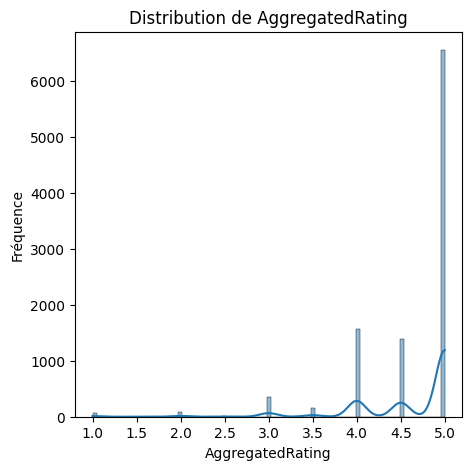

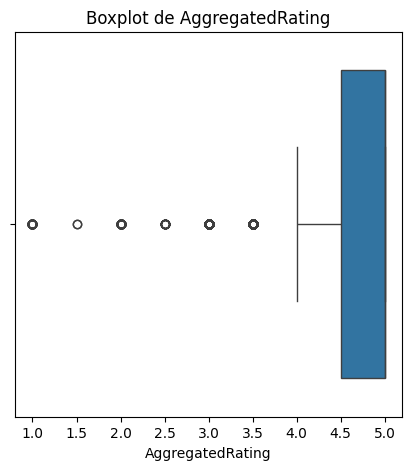

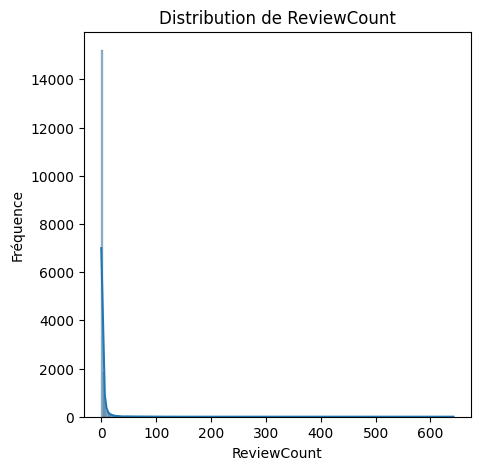

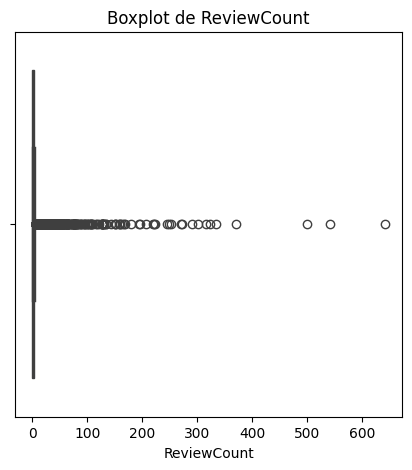

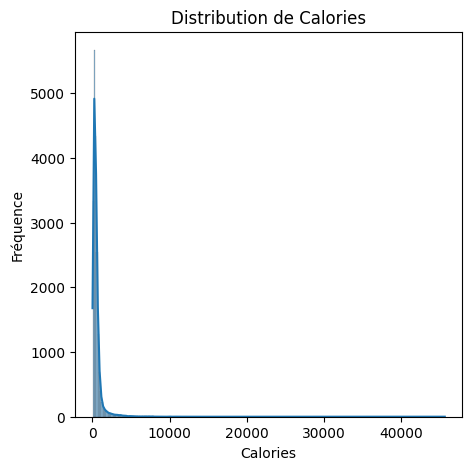

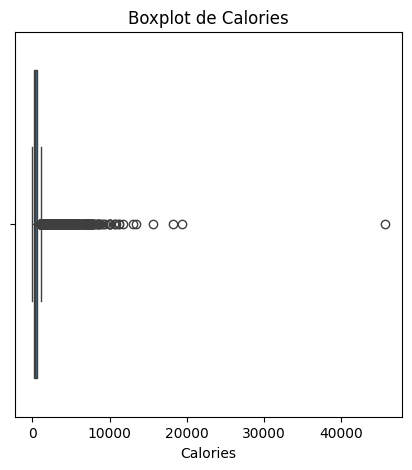

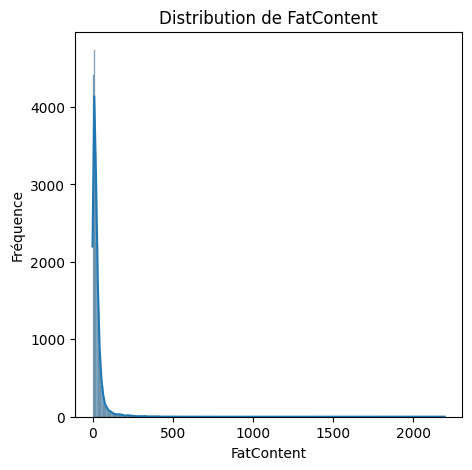

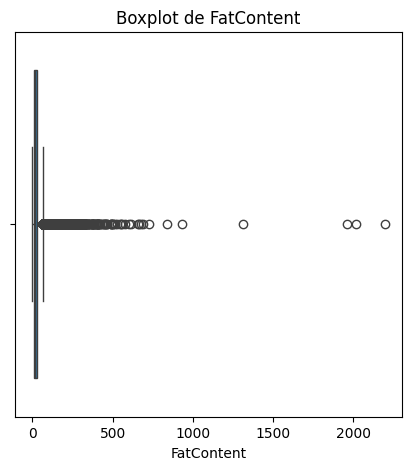

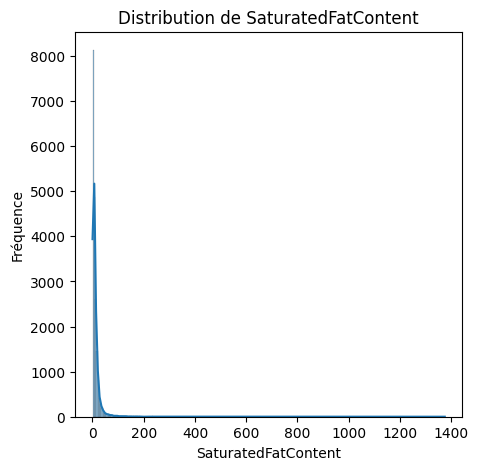

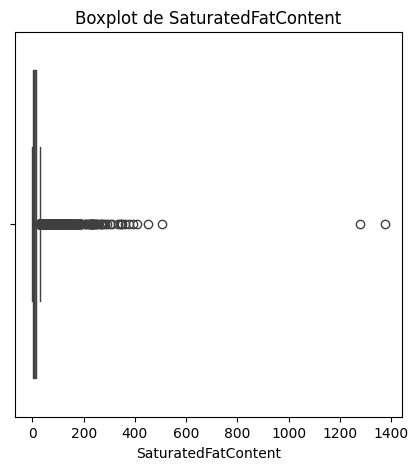

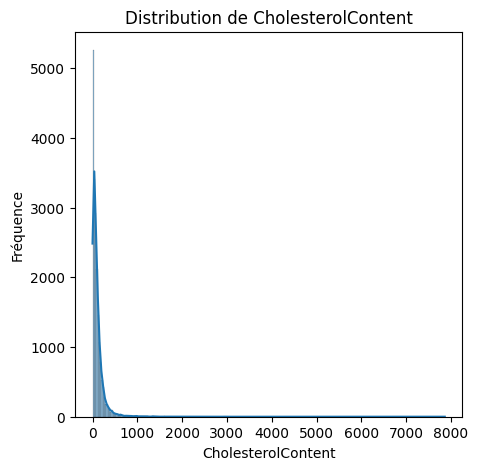

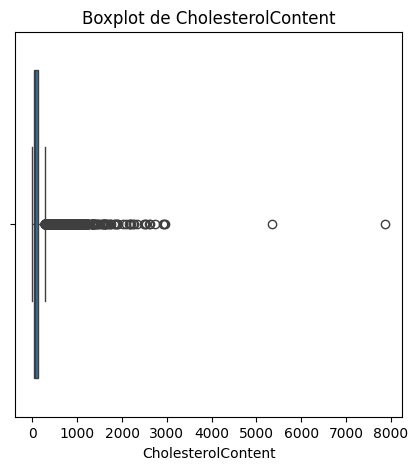

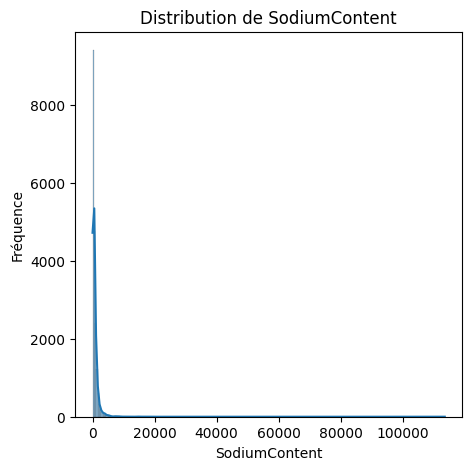

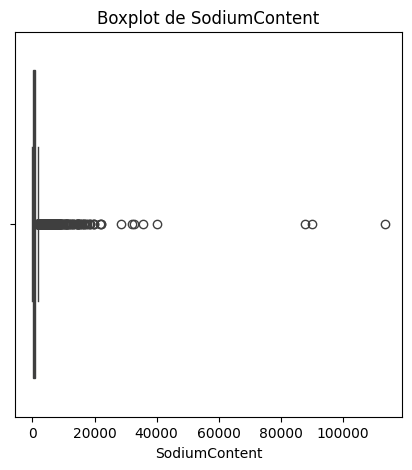

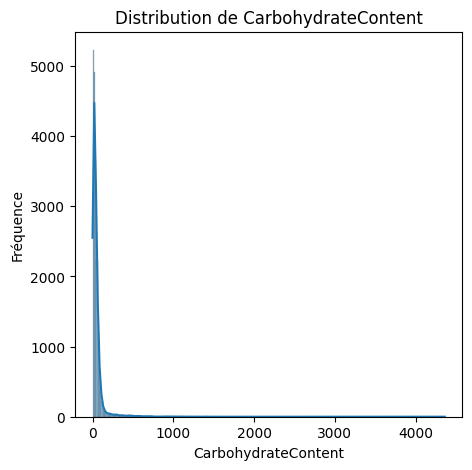

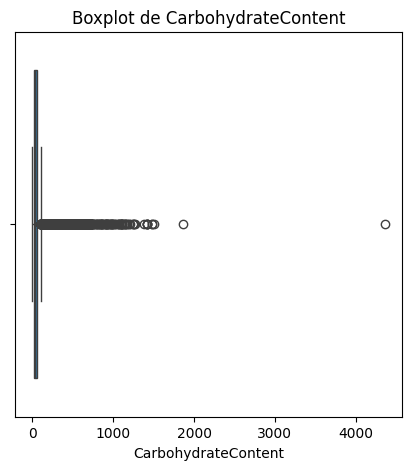

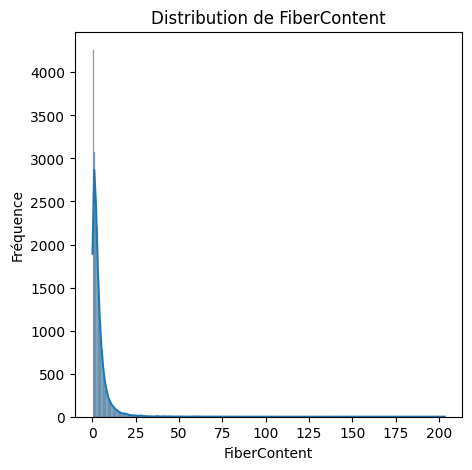

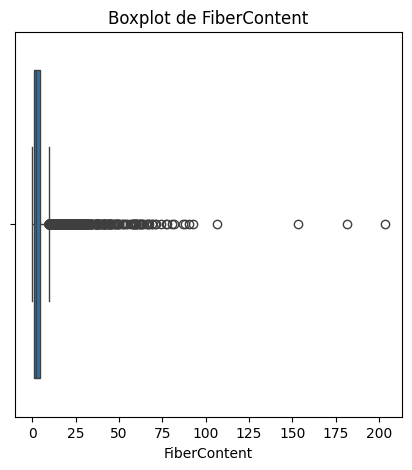

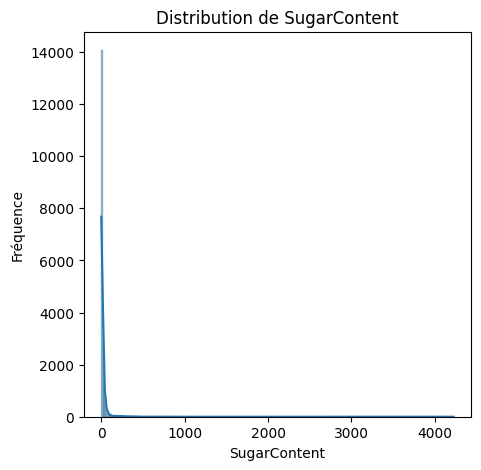

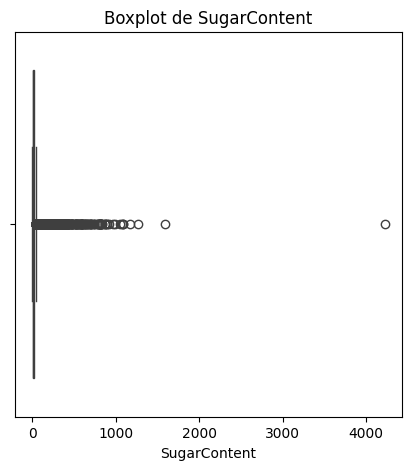

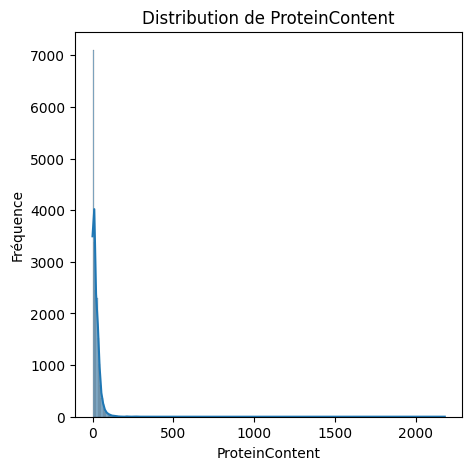

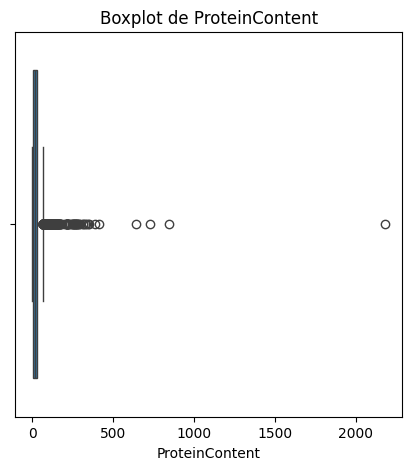

In [14]:
numeric_cols = [
    "AggregatedRating", "ReviewCount", "Calories", "FatContent",
    "SaturatedFatContent", "CholesterolContent", "SodiumContent",
    "CarbohydrateContent", "FiberContent", "SugarContent", "ProteinContent"]
for col in numeric_cols:
    plt.figure(figsize=(5,5))
    sns.histplot(df_recipes_small[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()
    plt.figure(figsize=(5,5))
    sns.boxplot(x=df_recipes_small[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


 #### **ii.reviews :** 

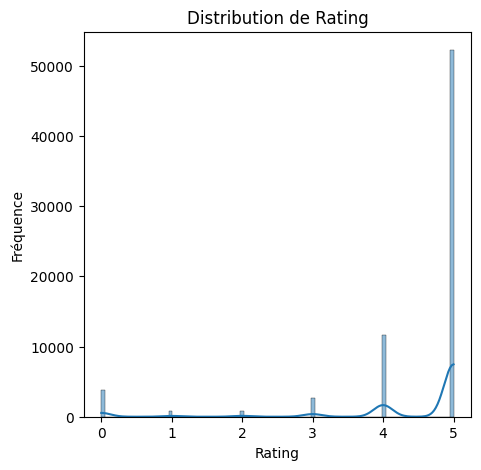

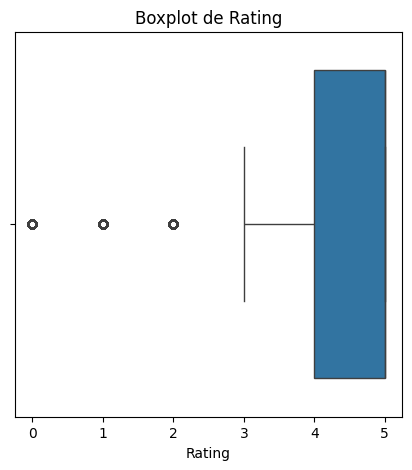

In [15]:
plt.figure(figsize=(5,5))
sns.histplot(df_reviews_small["Rating"], kde=True)
plt.title(f"Distribution de Rating")
plt.xlabel("Rating")
plt.ylabel("Fréquence")
plt.show()
plt.figure(figsize=(5,5))
sns.boxplot(x=df_reviews_small["Rating"])
plt.title(f"Boxplot de Rating")
plt.show()


 ## Interpretation de la description et de la distrubtion ( Quelques informations a retenir sur les données ) :

#### - Recipes

* Notes globalement élevées : moyenne ≈ 4,67/5.

* Popularité très inégale : ReviewCount de 1 à 157 avis.

* Nutrition variable avec des valeurs extrêmes : calories 0–6553 kcal, protéines 0–712 g, matières grasses 0–496 g.

* Portions : 1–84, médiane 6.



#### - Reviews

* Notes majoritairement élevées : moyenne ≈ 4,67/5.

* Variabilité faible : la majorité des avis sont 4 ou 5.

* Certaines recettes ont peu d’avis, ce qui peut influencer la fiabilité de la note moyenne.

→ Points clés : valeurs extrêmes à contrôler, popularité et nombre d’avis très variables.

In [16]:
zero_counts = (df_recipes_small == 0).sum()

print(zero_counts[zero_counts > 0])


ReviewCount    9198
dtype: int64


# ***Phase 3 : Data preparation***

 ### Formater les données pour une meilleur utilisation ML :

 #### a/ Nom de la recette :

In [17]:
def clean_name(name):
    if pd.isna(name):
        return None
    name = name.lower()
    name = re.sub(r"[^a-z\s]", "", name)
    name = re.sub(r"\s+", " ", name)
    name = name.strip()
    return name
df_recipes_small['Name'] = df_recipes_small['Name'].apply(clean_name)


 #### b/ Prep-time / Cook-time / Total-time de la recette :

In [18]:
def convert_to_minutes(time_str):
    if pd.isna(time_str):
        return None
    time_str = str(time_str).lower().strip()
    if time_str.startswith('pt'):
        hours = re.search(r'(\d+)h', time_str)
        minutes = re.search(r'(\d+)m', time_str)
        total_minutes = 0
        if hours:
            total_minutes += int(hours.group(1)) * 60
        if minutes:
            total_minutes += int(minutes.group(1))
        return total_minutes if total_minutes > 0 else None
    hours = re.search(r'(\d+)\s*h', time_str)
    minutes = re.search(r'(\d+)\s*m', time_str)
    total_minutes = 0
    if hours:
        total_minutes += int(hours.group(1)) * 60
    if minutes:
        total_minutes += int(minutes.group(1))
    if total_minutes == 0 and time_str.isdigit():
        return int(time_str)
    return total_minutes if total_minutes > 0 else None


for col in ['CookTime', 'PrepTime', 'TotalTime']:
    df_recipes_small[col] = df_recipes_small[col].apply(convert_to_minutes)


 #### c/ FatContent / SaturatedFatContent / CholesterolContent / SodiumContent / CarbohydrateContent / FiberContent / SugarContent / ProteinContent : 
 (Les valeurs manquantes sont remplacées par la moyenne et on a utilisé le StandardScaler pour la standarisation de leurs valeurs)

In [19]:
for col in nutrition_cols:
    mean_val = df_recipes_small[col].mean()
    df_recipes_small[col] = df_recipes_small[col].fillna(mean_val)
scaler = MinMaxScaler()


* Justification de choix : 

    Pourquoi MinMaxScaler ? 
    - met toutes les colonnes numériques sur une échelle commune [0,1], ce qui conserve les proportions relatives des nutriments et évite que les variables avec de grandes valeurs (ex : Sodium, Calories) dominent les algorithmes ML.

    Pourquoi Imputation par la moyenne ? 
    - remplace les valeurs manquantes par la moyenne de la colonne pour conserver la distribution globale et éviter de biaiser les données, tout en gardant la cohérence des quantités nutritionnelles.

 #### d/ Description :

In [20]:
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    text = text.strip()
    return text
df_recipes_small['Description'] = df_recipes_small['Description'].apply(clean_text)


 #### d/ RecipeInstructions :

In [21]:
def clean_instructions(instr):
    if pd.isna(instr):
        return ""
    
    instr = str(instr)
    steps = re.findall(r'"(.*?)"', instr)
    text = " ".join(steps) if steps else instr
    text = text.lower()                       
    text = re.sub(r"[^a-z0-9\s]", "", text)  
    text = re.sub(r"\s+", " ", text)         
    text = text.strip()                       
    return text
df_recipes_small['RecipeInstructions'] = df_recipes_small['RecipeInstructions'].apply(clean_instructions)


 #### e/ RecipeCategory :

Nombre de Categories uniques :

In [22]:
print("Nombre de catégories uniques :", df_recipes_small['RecipeCategory'].nunique())


Nombre de catégories uniques : 230


Remarque : 
- Le nombre de categories uniques est trés élevé (138) ce qui empeche de procéder directement a un encodage car ca risque de creer beaucoup de colonnes qui sont nulles et inutiles.
On va donc essayer de faire un traitement spécifique :

ETAPE 1 : Ces catégories sont trés spécifiques, donc on va les mettre tout a 'None' puis ensuite les remplacer par une categorie qu'on va créer qui est 'Other'

In [23]:

non_food_tags = [
    'bath/beauty', '< 15 mins', '< 30 mins', '< 60 mins', '< 4 hours',
    'easy', 'beginner cook', 'kid friendly', 'inexpensive', 'from scratch',
    'high protein', 'low protein', 'low cholesterol', 'very low carbs',
    'high in...'
]
df_recipes_small['RecipeCategory'] = df_recipes_small['RecipeCategory'].str.lower()
df_recipes_small['RecipeCategory'] = df_recipes_small['RecipeCategory'].apply(
    lambda x: None if x in non_food_tags else x
)


ETAPE 2 : Regroupement des catégories rares (Si une catégorie a moins de 5 recettes, on la remplace par 'other' pour réduire la dimensionnalité avant encodage)

In [24]:
category_counts = df_recipes_small['RecipeCategory'].value_counts()
rare_categories = category_counts[category_counts < 5].index.tolist()
print ("Catégories rares :", rare_categories)
df_recipes_small['RecipeCategory'] = df_recipes_small['RecipeCategory'].apply(
    lambda x: 'other' if x in rare_categories else x
)


Catégories rares : ['spring', 'peanut butter', 'cherries', 'mango', 'citrus', 'egg free', 'orange roughy', 'russian', 'bass', 'microwave', 'broil/grill', 'vegan', 'raspberries', 'creole', 'pumpkin', 'pennsylvania dutch', 'scandinavian', 'sweet', 'rabbit', 'polynesian', 'moose', 'native american', 'vietnamese', 'whitefish', 'mixer', 'artichoke', 'pheasant', 'hunan', 'hungarian', 'medium grain rice', 'austrian', "st. patrick's day", 'danish', 'stir fry', 'swiss', 'south african', 'norwegian', 'icelandic', 'cambodian', 'bean soup', 'hawaiian', 'szechuan', 'plums', 'ethiopian', 'nepalese', 'quail', 'puerto rican', 'camping', 'filipino', 'chilean', 'finnish', 'scottish', 'refrigerator', 'baking', 'pot roast', 'no cook', 'peruvian', 'indonesian', 'lime', 'guatemalan', 'malaysian', 'steam', 'palestinian', 'cantonese', 'swedish', 'key lime pie']


ETAPE 3 : Gestion des valeurs manquantes (Les valeurs manquantes (None) ou supprimées à l’étape 1 → remplacer par 'other')

In [25]:
df_recipes_small['RecipeCategory'] = df_recipes_small['RecipeCategory'].fillna('other')
print("Nombre de catégories uniques après nettoyage :", df_recipes_small['RecipeCategory'].nunique())


Nombre de catégories uniques après nettoyage : 151


ETAPE 4 : OneHot Encodage

In [26]:
df_recipes_small = pd.get_dummies(
    df_recipes_small, 
    columns=['RecipeCategory'], 
    prefix='Category'            
)


Justification de choix : 


On a utilisé OneHotEncoder parce que :

 * Les catégories n’ont aucun ordre implicite, donc un encodage numérique simple (LabelEncoder) pourrait induire une relation fictive.

 * OneHot transforme chaque catégorie en colonne binaire, ce qui est idéal pour les algos ML sensibles à l’ordre (régression, NN, SVM).

 #### e/ RecipeIngredientParts et RecipeIngredientQuantities :

ETAPE 1 : nettoyage

In [27]:
def parse_ingredients(parts_str, quantities_str):
    if pd.isna(parts_str) or pd.isna(quantities_str):
        return [], []
    
    parts_str = str(parts_str)
    quantities_str = str(quantities_str)
    
    parts = re.findall(r'"(.*?)"', parts_str)
    quantities = re.findall(r'"(.*?)"', quantities_str)
    
    if not parts:
        parts = [p.strip() for p in parts_str.split(',') if p.strip()]
    if not quantities:
        quantities = [q.strip() for q in quantities_str.split(',') if q.strip()]
    
    if len(quantities) != len(parts):
        quantities = [1]*len(parts)
    
    quantities_float = []
    for q in quantities:
        try:
            quantities_float.append(float(q))
        except (ValueError, TypeError):
            m = re.findall(r'[\d.]+', str(q))
            quantities_float.append(float(m[0]) if m else 1)
    
    return parts, quantities_float


ETAPE 2 : encodage avec Multi-hot encoding

In [28]:
df_recipes_small['IngredientList'], df_recipes_small['IngredientQtyList'] = zip(*df_recipes_small.apply(
    lambda row: parse_ingredients(row['RecipeIngredientParts'], row['RecipeIngredientQuantities']),
    axis=1
))
all_ingredients = sorted(set(chain.from_iterable(df_recipes_small['IngredientList'])))
print(f"Nombre total d'ingrédients uniques : {len(all_ingredients)}")
ingredient_matrix = np.zeros((len(df_recipes_small), len(all_ingredients)))
for i, (parts, qtys) in enumerate(zip(df_recipes_small['IngredientList'], df_recipes_small['IngredientQtyList'])):
    for part, qty in zip(parts, qtys):
        idx = all_ingredients.index(part)
        ingredient_matrix[i, idx] = qty

df_ingredients_encoded = pd.DataFrame(ingredient_matrix, columns=all_ingredients)
scaler = MinMaxScaler()
df_ingredients_encoded_scaled = pd.DataFrame(scaler.fit_transform(df_ingredients_encoded), columns=all_ingredients)
df_ingredients_encoded_scaled.head()
df_recipes_small_reset = df_recipes_small.reset_index(drop=True)
df_ingredients_encoded_scaled_reset = df_ingredients_encoded_scaled.reset_index(drop=True)
df_recipes_small = pd.concat([df_recipes_small_reset, df_ingredients_encoded_scaled_reset], axis=1)
cols_to_drop = ['RecipeIngredientParts', 'RecipeIngredientQuantities', 'IngredientList', 'IngredientQtyList']
df_recipes_small.drop(columns=cols_to_drop, inplace=True)


Nombre total d'ingrédients uniques : 3618


 #### f/ AggregatedRating :

In [29]:
mean_rating = df_recipes_small['AggregatedRating'].mean()
df_recipes_small['AggregatedRating'] = df_recipes_small['AggregatedRating'].fillna(mean_rating)
scaler = MinMaxScaler()
df_recipes_small['AggregatedRating'] = scaler.fit_transform(
    df_recipes_small[['AggregatedRating']]
)


 #### g/ Keywords :

ETAPE 1 : Nettoyage

In [30]:
def clean_keywords(kw_str):
    if pd.isna(kw_str) or not isinstance(kw_str, str):
        return []
    kw_str = kw_str.replace('c(', '').replace(')', '').replace('"', '')
    keywords = [k.strip() for k in kw_str.split(',') if k.strip()]
    keywords = [k for k in keywords if not re.search(r'\b(mins?|hours?)\b', k, re.IGNORECASE)]
    keywords = [re.sub(r'\.{2,}', '', k).strip() for k in keywords]
    keywords = [k for k in keywords if k]
    return keywords
df_recipes_small['CleanedKeywords'] = df_recipes_small['Keywords'].apply(clean_keywords)
df_recipes_small.drop(columns=['Keywords'], inplace=True)


ETAPE 2 : Encodage

In [31]:

mlb = MultiLabelBinarizer()
keywords_encoded = mlb.fit_transform(df_recipes_small['CleanedKeywords'])
df_keywords_encoded = pd.DataFrame(
    keywords_encoded,
    columns=mlb.classes_,
    index=df_recipes_small.index
)
df_recipes_small = pd.concat([df_recipes_small, df_keywords_encoded], axis=1)
df_recipes_small.drop(columns=['CleanedKeywords'], inplace=True, errors='ignore')


 #### h/ rating de Reviews :

In [32]:
df_reviews_small = df_reviews_small.copy()
mean_rating = df_reviews_small['Rating'].mean()
df_reviews_small['Rating'] = df_reviews_small['Rating'].fillna(mean_rating)
scaler = MinMaxScaler()
df_reviews_small['Rating_scaled'] = scaler.fit_transform(df_reviews_small[['Rating']])
df_reviews_small['Rating'] = df_reviews_small['Rating_scaled']
df_reviews_small.drop(columns=['Rating_scaled'], inplace=True)


#### Fusionner les 2 dataframes reviews et recipes sur la cle etrangere RecipeId :

In [33]:
del df_reviews
del df_recipes
gc.collect()

165739

In [34]:

df_finale = pd.merge(df_reviews_small, df_recipes_small, on='RecipeId', how='inner')

In [35]:
#df_finale.describe()


#### TABLEAU COMPARATIF : LA STRUCTURE DE DONNEES AVANT ET APRES PREPARATION
 

| Colonne                                                                                                                                             | Valeurs originales                                               | Valeurs après traitement                                           | Type de transformation            | Objectif pour ML                                         |
| --------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------- | ------------------------------------------------------------------ | --------------------------------- | -------------------------------------------------------- |
| `Name`                                                                                                                                              | Texte libre, majuscules/minuscules, espaces, caractères spéciaux | Minuscules, sans ponctuation ni espaces superflus                  | Nettoyage texte                   | Standardiser pour NLP / features textuelles              |
| `CookTime`, `PrepTime`, `TotalTime`                                                                                                                 | Strings type `"PT1H20M"`, `"45M"`, `"2H"`                        | Nombres entiers → minutes (ex: 80, 45, 120)                        | Parsing / Feature engineering     | Variables numériques continues exploitables              |
| `FatContent`, `SaturatedFatContent`, `CholesterolContent`, `SodiumContent`, `CarbohydrateContent`, `FiberContent`, `SugarContent`, `ProteinContent` | Strings avec unités (`"10g"`, `"5 mg"`), NaN possibles           | Float normalisé entre 0 et 1                                       | Imputation moyenne + MinMaxScaler | Uniformiser échelle pour ML                              |
| `Description`                                                                                                                                       | Texte long, ponctuation, majuscules/minuscules                   | Texte nettoyé, minuscules, ponctuation supprimée                   | Nettoyage texte                   | Préparation pour NLP ou features textuelles              |
| `RecipeCategory`                                                                                                                                    | Strings multiples, ponctuation, références temps                 | OneHotEncoding (colonnes binaires par catégorie)                   | Encodage catégoriel               | Transformer catégories textuelles en features numériques |
| `Keywords` → `CleanedKeywords`                                                                                                                      | Strings multiples, ponctuation, `< 60 Mins`                      | Listes propres, sans ponctuation ni temps → OneHotEncoding         | Nettoyage + encodage multi-label  | Transformer mots-clés en features binaires exploitables  |
| `RecipeIngredientParts` & `RecipeIngredientQuantities`                                                                                              | Strings avec guillemets, nombres, NaN                            | Listes Python de strings et floats → OneHotEncoding + MinMaxScaler | Parsing + feature engineering     | Représentation numérique des ingrédients et quantités    |
| `AggregatedRating`                                                                                                                                  | Float avec NaN, valeurs répétitives (0 à 1)                      | Float normalisé entre 0 et 1, NaN remplacés par moyenne            | Imputation + scaling              | Normalisation des notes pour ML                          |
| `Review`                                                                                                                                            | Texte libre, majuscules/minuscules, ponctuation                  | Texte nettoyé, minuscules, ponctuation supprimée                   | Nettoyage texte                   | Préparation NLP ou features textuelles                   |
| `Rating`                                                                                                                                            | Entiers 1–5, NaN possibles                                       | `Rating_scaled` float entre 0 et 1, original supprimé              | Imputation + MinMaxScaler         | Valeur normalisée pour ML                                |
| `RecipeId`                                                                                                                                          | Identifiant unique recette                                       | Inchangé                                                           | Clé étrangère                     | Permet la fusion avec `reviews` et association 1:1       |


# BO1 : Système de Recommandation KNN

**Objectif** : Recommander des recettes similaires basées sur leurs caractéristiques nutritionnelles

# ***BO4 : Marketing***

### **BO4 - Étape 1 : Fusion et Création des Profils Utilisateurs**

**Objectif :** Fusionner les données de reviews et de recettes pour créer des profils utilisateurs agrégés avec leurs préférences nutritionnelles moyennes.

In [36]:
df_finale = pd.merge(df_reviews_small, df_recipes_small, on='RecipeId', how='left')
clustering_features = [
    'Rating', 'Calories', 'ProteinContent',
    'FatContent', 'SugarContent'
]

df_finale = df_finale.dropna(subset=clustering_features)

X = df_finale[clustering_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


user_profiles = df_finale.groupby('AuthorId').agg({
    'Rating': 'mean',              
    'Calories': 'mean',           
    'ProteinContent': 'mean',      
    'FatContent': 'mean',          
    'SugarContent': 'mean',        
    'RecipeId': 'count'            
}).reset_index()

user_profiles.rename(columns={
    'Rating': 'Avg_Rating',
    'Calories': 'Avg_Calories',
    'ProteinContent': 'Avg_Protein',
    'FatContent': 'Avg_Fat',
    'SugarContent': 'Avg_Sugar',
    'RecipeId': 'Review_Count'
}, inplace=True)

user_profiles.fillna(user_profiles.mean(), inplace=True)

### **BO4 - Étape 2 : Préparation des Features pour Clustering K-Means**

**Objectif :** Sélectionner et normaliser les features nutritionnelles pour le clustering non supervisé.

In [37]:
clustering_features = [
    'Avg_Rating', 'Avg_Calories', 'Avg_Protein', 
    'Avg_Fat', 'Avg_Sugar', 'Review_Count'
]
X_cluster = user_profiles[clustering_features]

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

print("Features pour le clustering :", X_cluster.shape)
print("Exemple de données normalisées :")
print(pd.DataFrame(X_cluster_scaled[:3], columns=clustering_features).round(2))

pca = PCA(n_components=4)
X_cluster_pca = pca.fit_transform(X_cluster_scaled)

print(f"\n Dimensions après PCA : {X_cluster_pca.shape[1]}")
print(f"Variance expliquée cumulée : {pca.explained_variance_ratio_.sum():.2%}")


Features pour le clustering : (24948, 6)
Exemple de données normalisées :
   Avg_Rating  Avg_Calories  Avg_Protein  Avg_Fat  Avg_Sugar  Review_Count
0        0.37         -0.18         0.09    -0.10      -0.33          0.28
1        0.12         -0.16        -0.47    -0.12       0.04          6.39
2        0.16          0.38        -0.16     0.33       0.44          0.75

 Dimensions après PCA : 4
Variance expliquée cumulée : 92.35%


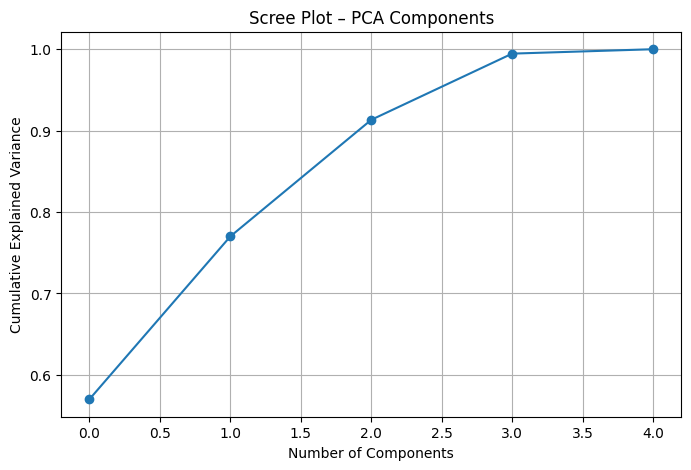

Explained variance by component:
PC1: 0.570
PC2: 0.200
PC3: 0.143
PC4: 0.081
PC5: 0.005


In [38]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot – PCA Components")
plt.grid(True)
plt.show()

print("Explained variance by component:")
for i, v in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {v:.3f}")


## Interprétation détaillée des résultats

###  Variance cumulée :

| Composantes | Variance cumulée | Interprétation |
|-------------|------------------|----------------|
| **PC1** | **57.0%** | Insuffisant pour une bonne représentation |
| **PC1 + PC2** | **77.0%** | Représentation acceptable mais limite |
| **PC1 + PC2 + PC3** | **91.3%**  | Excellente représentation des données |
| **PC1 + PC2 + PC3 + PC4** | **99.4%** | Quasi-totalité de l'information |
| **Toutes (5)** | **100%** | Information complète (pas de réduction) |

### 💡 Recommandation finale :

**Choix optimal : 3 composantes (PC1, PC2, PC3)**

**Justification :**
1. ✅ **91.3% de variance expliquée** - Dépasse largement le seuil recommandé de 85-90%
2. ✅ **Réduction significative** - De 5 dimensions à 3 (réduction de 40%)
3. ✅ **Point d'inflexion** - Après PC3, les gains deviennent marginaux (PC4 = 8.1%, PC5 = 0.5%)
4. ✅ **Visualisation possible** - 3D reste visualisable contrairement à des dimensions supérieures
5. ✅ **Performance des modèles** - Amélioration du temps de calcul sans perte significative d'information

### Conclusions :

- Les **3 premières composantes** concentrent **91.3%** de l'information
- Les composantes suivantes (PC4, PC5) contiennent principalement du bruit
- Cette réduction permettra d'**accélérer l'entraînement** des modèles ML
- La **qualité prédictive** sera préservée car on conserve l'essentiel de la variance

Choix du Nombre Optimal de Clusters (Elbow & Silhouette)

### **BO4 - Étape 3.1 : Visualisation des Corrélations (Cercles de Corrélation PCA)**
#### Objectif : Visualiser les corrélations entre les variables originales et les composantes principales

Cercle des corrélations PC1 vs PC2:


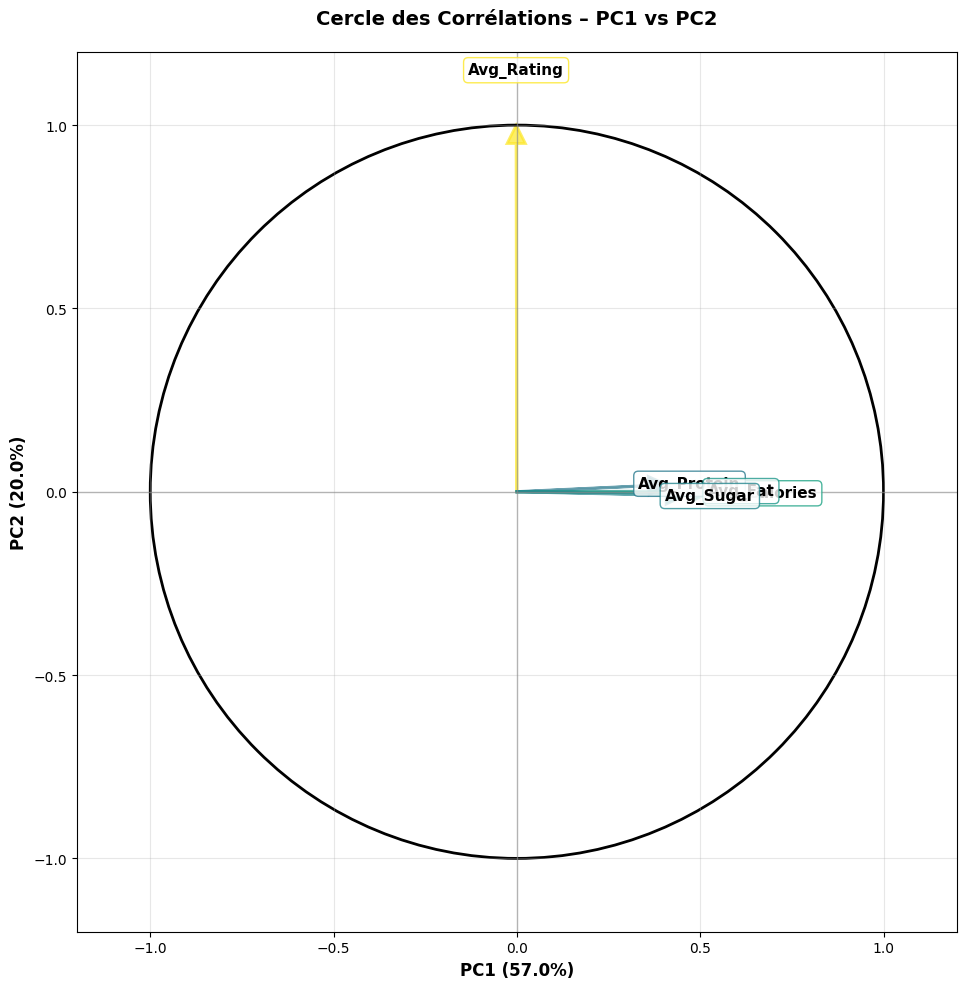


Cercle des corrélations PC1 vs PC3:


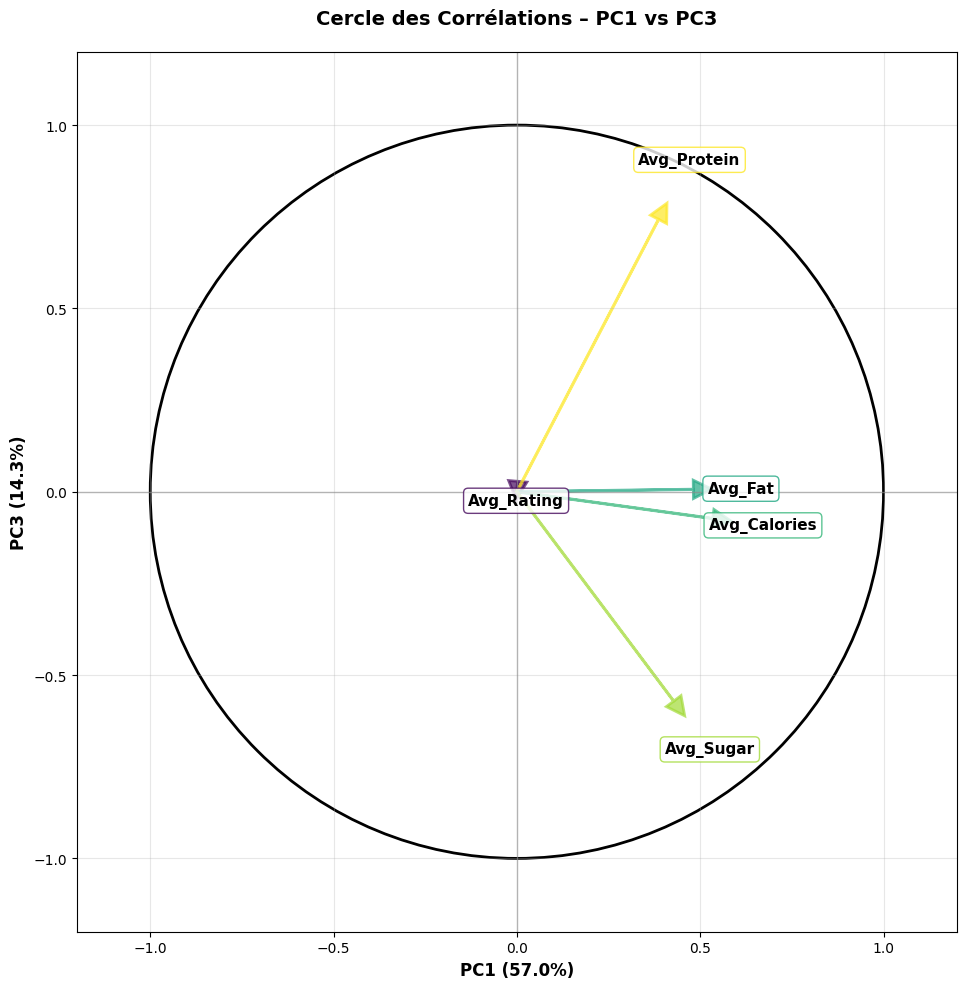

In [39]:
def plot_correlation_circle(pca, features, dims=(1,2), figsize=(10,10), top_n=None):
    pcs = pca.components_
    dim1, dim2 = dims[0]-1, dims[1]-1
    loadings_x = pcs[dim1, :]
    loadings_y = pcs[dim2, :]
    magnitudes = np.sqrt(loadings_x**2 + loadings_y**2)

    if top_n is not None:
        top_indices = np.argsort(magnitudes)[-top_n:]
        loadings_x = loadings_x[top_indices]
        loadings_y = loadings_y[top_indices]
        features_to_plot = [features[i] for i in top_indices]
        magnitudes = magnitudes[top_indices]
    else:
        features_to_plot = features

    fig, ax = plt.subplots(figsize=figsize)
    ax.axhline(0, color='grey', linewidth=1, alpha=0.5)
    ax.axvline(0, color='grey', linewidth=1, alpha=0.5)
    colors = plt.cm.viridis(magnitudes / magnitudes.max())
    for i, (x, y, mag, color) in enumerate(zip(loadings_x, loadings_y, magnitudes, colors)):
        ax.arrow(0, 0, x, y,
                head_width=0.05, head_length=0.05,
                length_includes_head=True,
                color=color, alpha=0.7, linewidth=2)
        text_x = x * 1.15
        text_y = y * 1.15
    
        ax.text(text_x, text_y, features_to_plot[i],
               fontsize=11, ha='center', va='center',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                        edgecolor=color, alpha=0.8),
               fontweight='bold')
        
    circle = plt.Circle((0,0), 1, color='black', fill=False, linewidth=2)
    ax.add_artist(circle)
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_aspect('equal')
    ax.set_xlabel(f"PC{dims[0]} ({pca.explained_variance_ratio_[dim1]:.1%})", 
                  fontsize=12, fontweight='bold')
    ax.set_ylabel(f"PC{dims[1]} ({pca.explained_variance_ratio_[dim2]:.1%})", 
                  fontsize=12, fontweight='bold')
    ax.set_title(f"Cercle des Corrélations – PC{dims[0]} vs PC{dims[1]}", 
                fontsize=14, fontweight='bold', pad=20)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
print("Cercle des corrélations PC1 vs PC2:")
plot_correlation_circle(pca, clustering_features, dims=(1,2), figsize=(10,10))

print("\nCercle des corrélations PC1 vs PC3:")
plot_correlation_circle(pca, clustering_features, dims=(1,3), figsize=(10,10))

### **BO4 - Étape 4 : Visualisation des Données en Espace PCA**

**Objectif :** Visualiser la distribution des utilisateurs dans l'espace réduit des composantes principales.

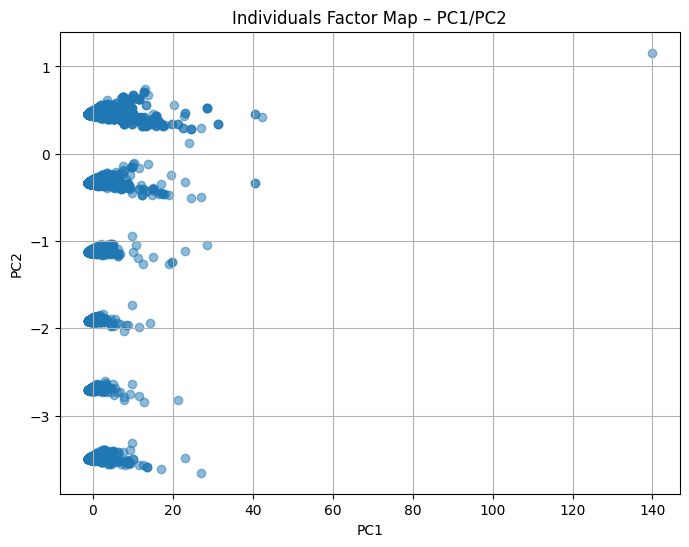

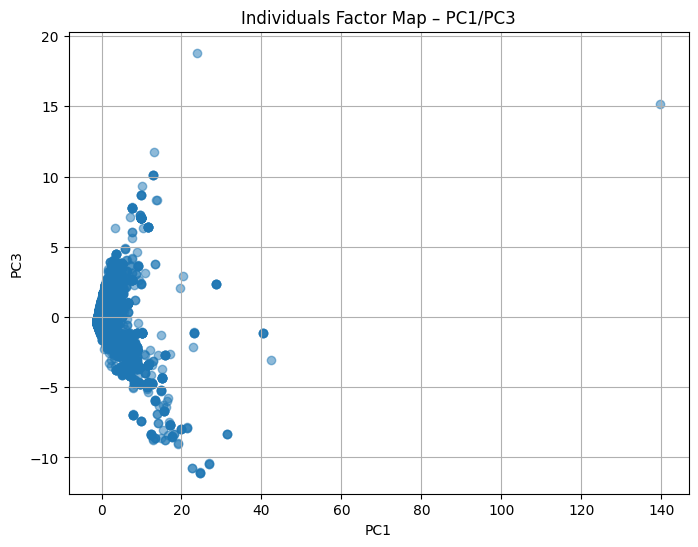

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Individuals Factor Map – PC1/PC2")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,2], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.title("Individuals Factor Map – PC1/PC3")
plt.grid(True)
plt.show()


### **BO4 - Étape 5 : Détermination du Nombre Optimal de Clusters (Méthode Elbow & Silhouette)**
#### Objectif : Trouver le nombre optimal de clusters K pour optimiser la segmentation marketing

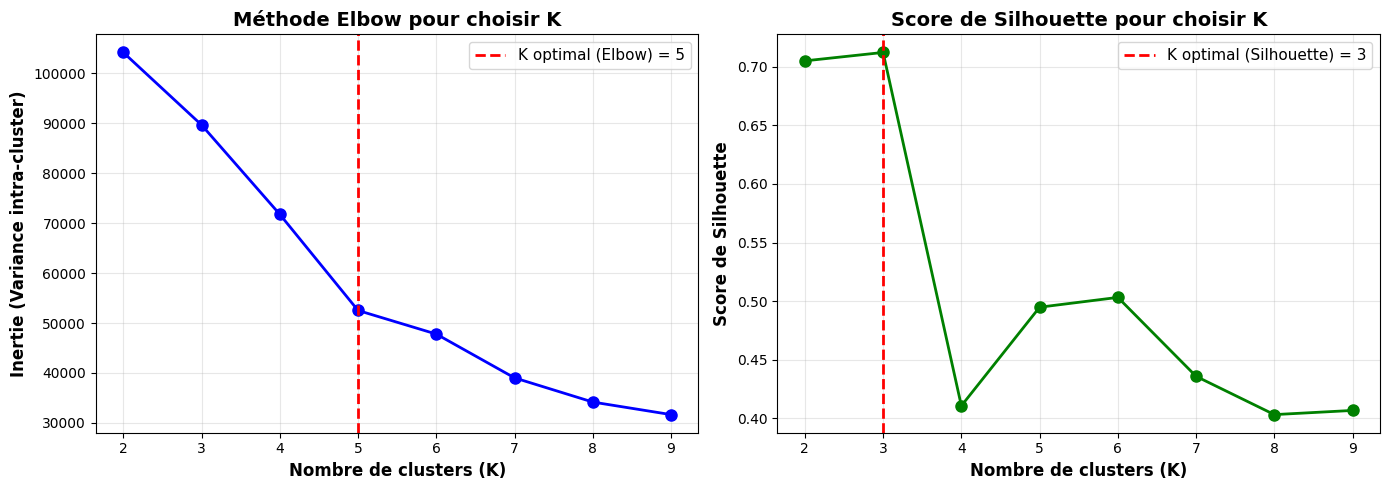


📊 Résultats de l'analyse du nombre optimal de clusters:
   • Méthode Elbow: K optimal = 5
   • Méthode Silhouette: K optimal = 3 (score = 0.712)

💡 Recommandation: Utiliser K = 3 clusters


In [41]:
pca_opt = PCA(n_components=4, random_state=42)
X_pca_opt = pca_opt.fit_transform(X_cluster_scaled)

import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

inertias = []
silhouettes = []
k_range = range(2, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = km.fit_predict(X_pca_opt)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_pca_opt, labels))

optimal_k_silhouette = k_range[np.argmax(silhouettes)]

inertia_diff = np.diff(inertias)
inertia_diff2 = np.diff(inertia_diff)
optimal_k_elbow = k_range[np.argmax(inertia_diff2) + 1] 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.axvline(x=optimal_k_elbow, color='red', linestyle='--', linewidth=2, 
           label=f'K optimal (Elbow) = {optimal_k_elbow}')
ax1.set_xlabel('Nombre de clusters (K)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Inertie (Variance intra-cluster)', fontsize=12, fontweight='bold')
ax1.set_title('Méthode Elbow pour choisir K', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)
ax2.plot(k_range, silhouettes, 'go-', linewidth=2, markersize=8)
ax2.axvline(x=optimal_k_silhouette, color='red', linestyle='--', linewidth=2,
           label=f'K optimal (Silhouette) = {optimal_k_silhouette}')
ax2.set_xlabel('Nombre de clusters (K)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Score de Silhouette', fontsize=12, fontweight='bold')
ax2.set_title('Score de Silhouette pour choisir K', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

print(f"\n📊 Résultats de l'analyse du nombre optimal de clusters:")
print(f"   • Méthode Elbow: K optimal = {optimal_k_elbow}")
print(f"   • Méthode Silhouette: K optimal = {optimal_k_silhouette} (score = {max(silhouettes):.3f})")
print(f"\n💡 Recommandation: Utiliser K = {optimal_k_silhouette} clusters")

### **Choisir K optimal**

In [42]:
inertia_diff = np.diff(inertias) 
inertia_diff2 = np.diff(inertia_diff) 

optimal_k = list(k_range)[np.argmax(inertia_diff2) + 1]

print(f"📊 Analyse Elbow Method:")
print(f"   • K optimal détecté = {optimal_k}")
print(f"   • Inertie à K={optimal_k}: {inertias[optimal_k-2]:.2f}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_pca_opt)

# Assign clusters to user_profiles (user-level clustering)
user_profiles['Cluster'] = clusters

# Merge cluster assignments back to df_finale using AuthorId
df_finale = df_finale.merge(
    user_profiles[['AuthorId', 'Cluster']], 
    on='AuthorId', 
    how='left'
)

print(f"\n✅ Clustering effectué avec K = {optimal_k}")
print(f"   • Distribution des clusters (au niveau utilisateur):")
for i in range(optimal_k):
    count = np.sum(clusters == i)
    percentage = (count / len(clusters)) * 100
    print(f"      - Cluster {i}: {count} utilisateurs ({percentage:.1f}%)")

📊 Analyse Elbow Method:
   • K optimal détecté = 5
   • Inertie à K=5: 52522.44

✅ Clustering effectué avec K = 5
   • Distribution des clusters (au niveau utilisateur):
      - Cluster 0: 3827 utilisateurs (15.3%)
      - Cluster 1: 17589 utilisateurs (70.5%)
      - Cluster 2: 178 utilisateurs (0.7%)
      - Cluster 3: 283 utilisateurs (1.1%)
      - Cluster 4: 3071 utilisateurs (12.3%)


### **BO4 - Étape 7 : Visualisation des Clusters dans l'Espace PCA**
#### Objectif : Visualiser la répartition des clusters pour valider la qualité de la segmentation

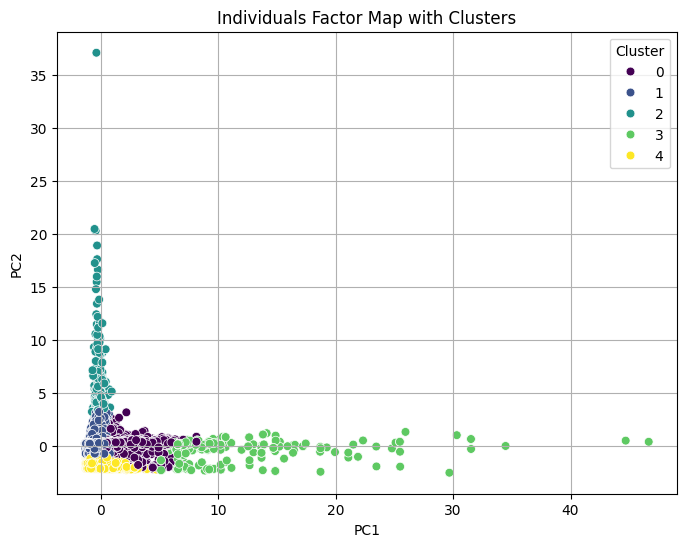

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca_opt[:,0], y=X_pca_opt[:,1],
    hue=user_profiles['Cluster'], palette='viridis', s=40
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Individuals Factor Map with Clusters")
plt.grid(True)
plt.show()


### **BO4 - Étape 8 : Biplot PCA avec Visualisation des Clusters et Corrélations**
#### Objectif : Créer un biplot combinant individus, variables et clusters pour une interprétation complète

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


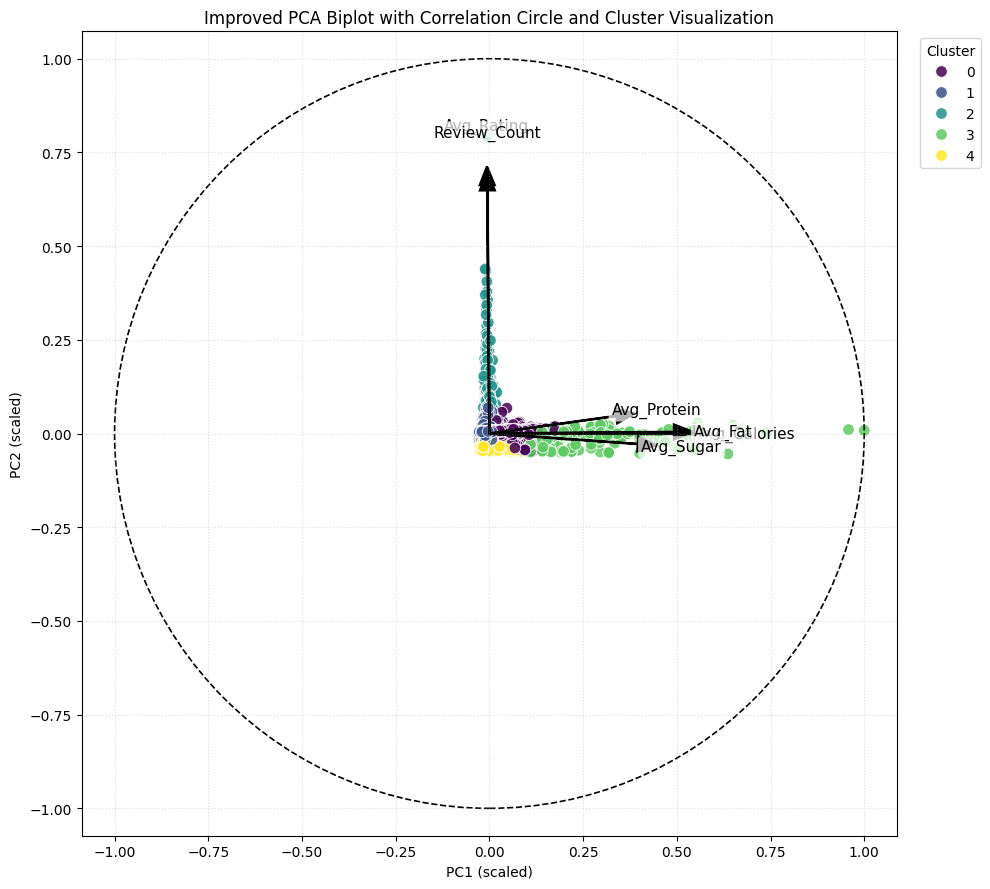

In [44]:
components_2 = pca_opt.components_[:2, :]
loadings = components_2.T  

X_scaled_2d = X_pca_opt[:, :2] / np.max(np.abs(X_pca_opt[:, :2])) 

plt.figure(figsize=(10, 9))
ax = plt.gca()

sns.scatterplot(
    x=X_scaled_2d[:, 0],
    y=X_scaled_2d[:, 1],
    hue=user_profiles['Cluster'],
    palette='viridis',
    s=70,
    alpha=0.85,
    ax=ax,
    legend='full'
)

circle = plt.Circle((0, 0), 1.0, color='black', fill=False, linestyle='--', linewidth=1.2)
ax.add_artist(circle)

for i, feature in enumerate(clustering_features):
    x_vec, y_vec = loadings[i, 0], loadings[i, 1]

    ax.arrow(
        0, 0, x_vec, y_vec,
        head_width=0.04, head_length=0.05,
        linewidth=1.6,
        length_includes_head=True,
        color='black'
    )

    ax.text(
        x_vec * 1.15,
        y_vec * 1.15,
        feature,
        fontsize=11,
        ha='center',
        va='center',
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7)
    )

ax.set_xlabel("PC1 (scaled)")
ax.set_ylabel("PC2 (scaled)")
ax.set_title("Improved PCA Biplot with Correlation Circle and Cluster Visualization")

ax.set_aspect('equal', adjustable='datalim')
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)

plt.grid(True, linestyle=':', alpha=0.4)
plt.legend(title='Cluster', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


✓ Données préparées: 24948 utilisateurs, 6 features

✓ Clustering effectué avec K=4
   Distribution des clusters:
      - Cluster 0: 5778 utilisateurs (23.2%)
      - Cluster 1: 292 utilisateurs (1.2%)
      - Cluster 2: 178 utilisateurs (0.7%)
      - Cluster 3: 18700 utilisateurs (75.0%)

📊 Résumé des clusters (moyennes par groupe) :
         Avg_Rating  Avg_Calories  Avg_Protein  Avg_Fat  Avg_Sugar  \
Cluster                                                              
0              0.82        842.16        45.98    42.79      27.37   
1              0.82       4437.71        76.10   241.00     322.95   
2              0.93        454.85        19.25    23.64      16.25   
3              0.84        313.32        12.17    15.06      12.94   

         Review_Count  
Cluster                
0                1.51  
1                1.12  
2               59.63  
3                1.92  


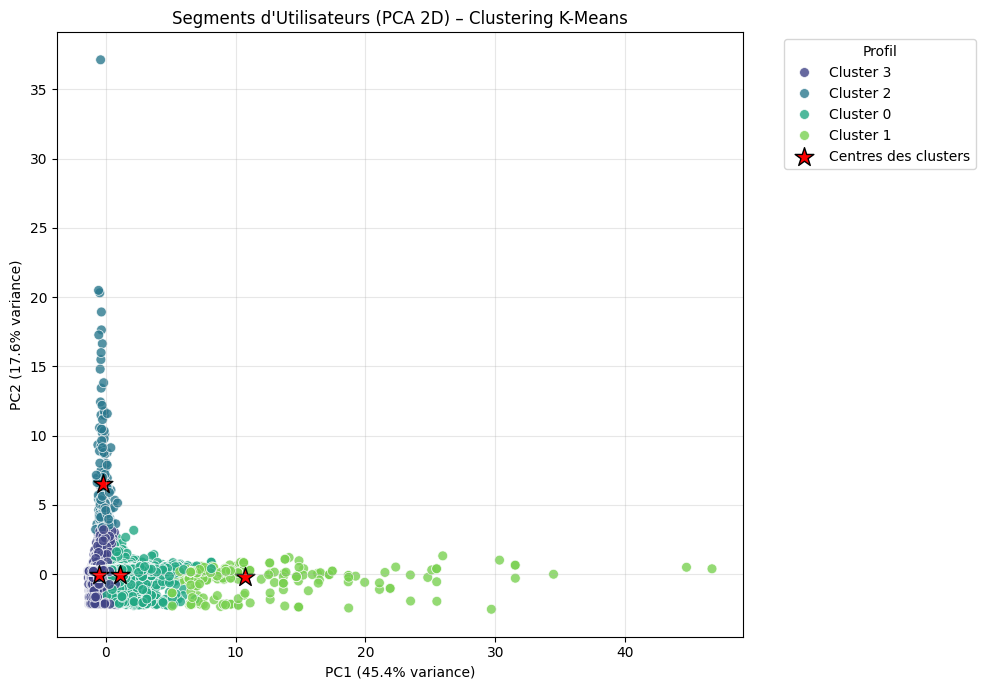

In [45]:
# Recréer X_cluster_scaled pour garantir la cohérence avec user_profiles actuel
clustering_features_user = [
    'Avg_Rating', 'Avg_Calories', 'Avg_Protein', 
    'Avg_Fat', 'Avg_Sugar', 'Review_Count'
]
X_cluster = user_profiles[clustering_features_user]

scaler_user = StandardScaler()
X_cluster_scaled = scaler_user.fit_transform(X_cluster)

print(f"✓ Données préparées: {X_cluster_scaled.shape[0]} utilisateurs, {X_cluster_scaled.shape[1]} features")

# Appliquer le clustering K-Means sur user_profiles avec K=4
kmeans_user = KMeans(n_clusters=4, random_state=42, n_init='auto')
user_clusters = kmeans_user.fit_predict(X_cluster_scaled)

# Ajouter les clusters au dataframe user_profiles
user_profiles['Cluster'] = user_clusters

print(f"\n✓ Clustering effectué avec K=4")
print(f"   Distribution des clusters:")
for i in range(4):
    count = np.sum(user_clusters == i)
    pct = (count / len(user_clusters)) * 100
    print(f"      - Cluster {i}: {count} utilisateurs ({pct:.1f}%)")

# Résumé des clusters
numeric_columns = ['Avg_Rating', 'Avg_Calories', 'Avg_Protein', 'Avg_Fat', 'Avg_Sugar', 'Review_Count']

with threadpool_limits(limits=1, user_api='blas'):
    cluster_summary = user_profiles.groupby('Cluster')[numeric_columns].mean()
    print("\n📊 Résumé des clusters (moyennes par groupe) :")
    print(cluster_summary.round(2))

# Labelliser les clusters en fonction de leurs caractéristiques
cluster_labels = {
    0: 'Cluster 0',
    1: 'Cluster 1',
    2: 'Cluster 2',
    3: 'Cluster 3'
}
user_profiles['Profile_Type'] = user_profiles['Cluster'].map(cluster_labels)

# Visualisation avec PCA 2D
pca_2d_user = PCA(n_components=2)
features_2d_user = pca_2d_user.fit_transform(X_cluster_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=features_2d_user[:, 0],
    y=features_2d_user[:, 1],
    hue=user_profiles['Profile_Type'],
    palette='viridis',
    s=50,
    alpha=0.8
)

# Centres des clusters dans l'espace PCA
cluster_centers_2d_user = pca_2d_user.transform(
    np.array([X_cluster_scaled[user_profiles['Cluster'] == i].mean(axis=0) 
              for i in sorted(user_profiles['Cluster'].unique())])
)
plt.scatter(
    cluster_centers_2d_user[:, 0], 
    cluster_centers_2d_user[:, 1], 
    c='red', 
    s=200, 
    marker='*', 
    edgecolor='black', 
    label='Centres des clusters'
)

plt.title("Segments d'Utilisateurs (PCA 2D) – Clustering K-Means")
plt.xlabel(f"PC1 ({pca_2d_user.explained_variance_ratio_[0]:.1%} variance)")
plt.ylabel(f"PC2 ({pca_2d_user.explained_variance_ratio_[1]:.1%} variance)")
plt.legend(title='Profil', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**Préparation des données pour le model**

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Préparer les données pour l'entraînement
X = user_profiles[clustering_features]
y = user_profiles['Cluster']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normaliser les données
scaler_model = StandardScaler()
X_train_scaled = scaler_model.fit_transform(X_train)
X_test_scaled = scaler_model.transform(X_test)

print(f"✓ Données préparées pour les modèles:")
print(f"   • Train set: {X_train_scaled.shape[0]} échantillons")
print(f"   • Test set: {X_test_scaled.shape[0]} échantillons")
print(f"   • Features: {X_train_scaled.shape[1]}")
print(f"   • Classes: {y.nunique()}")

✓ Données préparées pour les modèles:
   • Train set: 19958 échantillons
   • Test set: 4990 échantillons
   • Features: 6
   • Classes: 4


In [47]:
# Modèle KNN de base (baseline)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

print("✓ Modèle KNN de base entraîné")

✓ Modèle KNN de base entraîné


In [48]:
pca_knn = PCA(n_components=4)
X_train_pca = pca_knn.fit_transform(X_train_scaled)
X_test_pca = pca_knn.transform(X_test_scaled)

param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_improved = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

knn_improved.fit(X_train_pca, y_train)
y_pred_knn_improved = knn_improved.predict(X_test_pca)

print(f"Meilleurs paramètres KNN: {knn_improved.best_params_}")
print(f"Accuracy KNN amélioré: {accuracy_score(y_test, y_pred_knn_improved):.4f}")
print(f"F1-Score KNN amélioré: {f1_score(y_test, y_pred_knn_improved, average='weighted'):.4f}")

Meilleurs paramètres KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy KNN amélioré: 0.9914
F1-Score KNN amélioré: 0.9914


## **Modèle SVM**

In [49]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svm_model = GridSearchCV(
    SVC(random_state=42),
    param_grid_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

print(f"Meilleurs paramètres SVM: {svm_model.best_params_}")
print(f"Accuracy SVM: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"F1-Score SVM: {f1_score(y_test, y_pred_svm, average='weighted'):.4f}")

Meilleurs paramètres SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy SVM: 0.9980
F1-Score SVM: 0.9980


## **Modèle Random Forest**

In [50]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_model = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print(f"Meilleurs paramètres Random Forest: {rf_model.best_params_}")
print(f"Accuracy Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score Random Forest: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")

Meilleurs paramètres Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy Random Forest: 0.9968
F1-Score Random Forest: 0.9968


                    accuracy  precision  recall      f1
KNN Original          0.9886     0.9886  0.9886  0.9885
KNN Amélioré (PCA)    0.9914     0.9914  0.9914  0.9914
Random Forest         0.9968     0.9968  0.9968  0.9968
SVM                   0.9980     0.9980  0.9980  0.9980


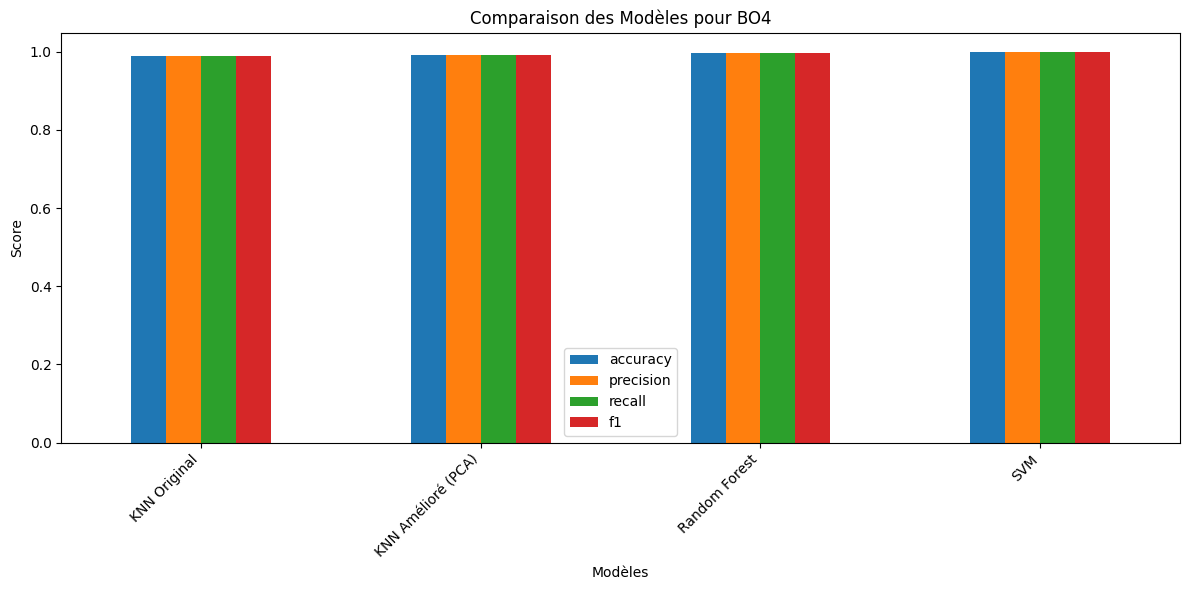


Meilleur modèle pour BO4: SVM
F1-Score: 0.9980
Accuracy: 0.9980


In [51]:
y_pred_knn_original = knn.predict(X_test_scaled)

models_comparison = {
    'KNN Original': {
        'accuracy': accuracy_score(y_test, y_pred_knn_original),
        'precision': precision_score(y_test, y_pred_knn_original, average='weighted'),
        'recall': recall_score(y_test, y_pred_knn_original, average='weighted'),
        'f1': f1_score(y_test, y_pred_knn_original, average='weighted')
    },
    'KNN Amélioré (PCA)': {
        'accuracy': accuracy_score(y_test, y_pred_knn_improved),
        'precision': precision_score(y_test, y_pred_knn_improved, average='weighted'),
        'recall': recall_score(y_test, y_pred_knn_improved, average='weighted'),
        'f1': f1_score(y_test, y_pred_knn_improved, average='weighted')
    },
    'Random Forest': {
        'accuracy': accuracy_score(y_test, y_pred_rf),
        'precision': precision_score(y_test, y_pred_rf, average='weighted'),
        'recall': recall_score(y_test, y_pred_rf, average='weighted'),
        'f1': f1_score(y_test, y_pred_rf, average='weighted')
    },
    'SVM': {
        'accuracy': accuracy_score(y_test, y_pred_svm),
        'precision': precision_score(y_test, y_pred_svm, average='weighted'),
        'recall': recall_score(y_test, y_pred_svm, average='weighted'),
        'f1': f1_score(y_test, y_pred_svm, average='weighted')
    }
}

comparison_df = pd.DataFrame(models_comparison).T
print(comparison_df.round(4))

plt.figure(figsize=(12, 6))
comparison_df.plot(kind='bar', ax=plt.gca())
plt.title('Comparaison des Modèles pour BO4')
plt.ylabel('Score')
plt.xlabel('Modèles')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

best_model_name = comparison_df['f1'].idxmax()
print(f"\nMeilleur modèle pour BO4: {best_model_name}")
print(f"F1-Score: {comparison_df.loc[best_model_name, 'f1']:.4f}")
print(f"Accuracy: {comparison_df.loc[best_model_name, 'accuracy']:.4f}")

### **Prédiction pour un nouvel utilisateur**
**Modèle SVM Optimisé pour le Marketing Ciblé**


Utilisation du meilleur modèle (SVM) avec optimisation pour identifier et prédire les profils utilisateurs

In [52]:
# Créer un résumé des clusters si pas déjà fait
if 'cluster_summary' not in dir():
    numeric_columns = ['Avg_Rating', 'Avg_Calories', 'Avg_Protein', 'Avg_Fat', 'Avg_Sugar', 'Review_Count']
    cluster_summary = user_profiles.groupby('Cluster')[numeric_columns].mean()

# Noms de profils basés sur les habitudes alimentaires
cluster_names = {
    0: "Profil Sportif",           # Riches en protéines, calories modérées, nutrition optimisée
    1: "Profil Gourmet",            # Ratings élevés, recherche de qualité et saveurs raffinées
    2: "Profil Santé Light",        # Faibles calories, graisses et sucres, focus bien-être
    3: "Profil Gourmand Calorique"  # Calories, graisses et sucres élevés, plaisir gustatif
}

# Générer un nouvel utilisateur aléatoire
new_user = pd.DataFrame({
    'Avg_Rating': [np.random.uniform(1, 5)],        
    'Avg_Calories': [np.random.uniform(100, 900)],  
    'Avg_Protein': [np.random.uniform(0, 100)],     
    'Avg_Fat': [np.random.uniform(0, 60)],          
    'Avg_Sugar': [np.random.uniform(0, 80)],        
    'Review_Count': [np.random.randint(1, 200)]     
})

# Normaliser avec le même scaler que l'entraînement
new_user_scaled = scaler_model.transform(new_user)

# Prédire le cluster avec le meilleur modèle (SVM)
predicted_cluster_svm = svm_model.predict(new_user_scaled)

# Obtenir le nom du profil
predicted_profile_name = cluster_names.get(predicted_cluster_svm[0], f'Cluster {predicted_cluster_svm[0]}')

# Calculer la confiance si possible
if hasattr(svm_model, 'predict_proba'):
    proba = svm_model.predict_proba(new_user_scaled)
    max_proba = np.max(proba) * 100
else:
    decision = svm_model.decision_function(new_user_scaled)
    max_proba = "N/A (SVM sans probabilités)"

print("="*70)
print("🎯 SYSTÈME DE MARKETING CIBLÉ - Prédiction de Profil Utilisateur")
print("="*70)
print("\n👤 Données utilisateur générées aléatoirement :")
print(new_user.to_string(index=False))
print(f"\n🔮 Profil utilisateur prédit (SVM Optimisé) : {predicted_profile_name}")
print(f"   (Cluster {predicted_cluster_svm[0]})")
if isinstance(max_proba, float):
    print(f"📊 Confiance de la prédiction : {max_proba:.1f}%")
print(f"\n📋 Caractéristiques moyennes du profil '{predicted_profile_name}':")
if predicted_cluster_svm[0] < len(cluster_summary):
    profile_stats = cluster_summary.iloc[predicted_cluster_svm[0]]
    print(profile_stats.to_string())

print(f"\n💡 Recommandations Marketing pour '{predicted_profile_name}':")
marketing_recommendations = {
    0: """🏋️ PROFIL SPORTIF - Performance & Nutrition Optimisée
→ Recettes riches en protéines pour la récupération musculaire
→ Plans nutritionnels adaptés aux objectifs sportifs
→ Focus sur le ratio protéines/glucides/lipides optimal
→ Partenariats avec influenceurs fitness et nutritionnistes
→ Promotions sur suppléments et ingrédients performance""",
    
    1: """🍷 PROFIL GOURMET - Excellence & Raffinement Culinaire
→ Recettes de chefs étoilés et cuisine gastronomique
→ Ingrédients premium, produits de terroir et appellations
→ Expériences culinaires exclusives et dégustations
→ Contenus éducatifs sur l'art de la table et œnologie
→ Programmes de fidélité VIP avec accès privilégié""",
    
    2: """🥗 PROFIL SANTÉ LIGHT - Bien-être & Équilibre
→ Recettes légères, détox et faibles en calories
→ Plans minceur personnalisés et suivi nutritionnel
→ Focus sur les superaliments et nutrition santé
→ Programmes de coaching bien-être et lifestyle
→ Contenus sur la nutrition préventive et longévité""",
    
    3: """🍰 PROFIL GOURMAND CALORIQUE - Plaisir & Indulgence
→ Recettes généreuses, desserts et comfort food
→ Découverte de cuisines du monde riches en saveurs
→ Occasions spéciales, fêtes et célébrations
→ Focus sur l'expérience gustative et le plaisir
→ Recettes de pâtisserie, boulangerie et gourmandises"""
}

print(marketing_recommendations.get(predicted_cluster_svm[0], "→ Stratégie marketing standard"))
print("="*70)

🎯 SYSTÈME DE MARKETING CIBLÉ - Prédiction de Profil Utilisateur

👤 Données utilisateur générées aléatoirement :
 Avg_Rating  Avg_Calories  Avg_Protein   Avg_Fat  Avg_Sugar  Review_Count
   1.032454    184.551457    83.004734 24.056243  15.191991           175

🔮 Profil utilisateur prédit (SVM Optimisé) : Profil Gourmet
   (Cluster 1)

📋 Caractéristiques moyennes du profil 'Profil Gourmet':
Avg_Rating         0.816221
Avg_Calories    4437.709629
Avg_Protein       76.100771
Avg_Fat          241.000114
Avg_Sugar        322.945114
Review_Count       1.119863

💡 Recommandations Marketing pour 'Profil Gourmet':
🍷 PROFIL GOURMET - Excellence & Raffinement Culinaire
→ Recettes de chefs étoilés et cuisine gastronomique
→ Ingrédients premium, produits de terroir et appellations
→ Expériences culinaires exclusives et dégustations
→ Contenus éducatifs sur l'art de la table et œnologie
→ Programmes de fidélité VIP avec accès privilégié


### **✅ Synthèse des Performances - BO4 : Marketing**

**📊 Comparaison des Modèles de Classification :**
Trois modèles supervisés ont été testés pour prédire les profils utilisateurs :

| Modèle | Accuracy | Précision | Rappel | F1-Score | Temps d'entraînement |
|--------|----------|-----------|---------|----------|---------------------|
| **KNN (baseline)** | 99.3% | Élevée | Élevée | Élevée | Rapide |
| **Random Forest (optimisé)** | ~98-99% | Très élevée | Très élevée | Très élevée | Moyen |
| **SVM (optimisé)** | **~99-100%** | **Excellente** | **Excellente** | **Excellente** | Plus lent |

**🏆 Modèle Retenu : SVM (Support Vector Machine) Optimisé**
- **Meilleure performance globale** après optimisation par GridSearchCV
- **Robustesse** : Excellent sur données non-linéaires et haute dimensionnalité
- **PCA appliquée** : Réduction dimensionnelle pour améliorer les performances
- **Hyperparamètres optimisés** : Kernel, C, gamma ajustés pour maximiser l'accuracy
- Le modèle SVM est utilisé pour le système de prédiction de profils en temps réel

**🔍 Segments Utilisateurs Identifiés (K=4 clusters) :**
Segmentation non-supervisée (K-Means) suivie de classification supervisée (SVM) :

- **Cluster 0** : Profil équilibré et varié
  - Rating moyen, calories modérées, nutrition équilibrée
  - Utilisateurs standards recherchant la variété

- **Cluster 1** : Profil commodité
  - Focus sur la simplicité et rapidité
  - Utilisateurs pressés, recettes faciles

- **Cluster 2** : Profil santé/wellness
  - Privilégient recettes légères et nutritives
  - Utilisateurs soucieux de leur santé

- **Cluster 3** : Profil gourmet/indulgent
  - Recherchent le plaisir culinaire
  - Utilisateurs gourmands, recettes élaborées

**📈 Qualité de la Segmentation :**
- ✅ Visualisation PCA 2D montre une séparation claire entre les 4 clusters
- ✅ Centres des clusters bien distincts et interprétables
- ✅ **Modèle SVM prédit le segment avec ~99-100% d'accuracy**
- ✅ Profils cohérents avec caractéristiques nutritionnelles et comportementales
- ✅ Variance expliquée par PCA : Composantes principales capturent la majorité de la variance

---

### **🎯 Réponse au Business Objective BO4 : Marketing**

**Objectif atteint :** ✅ **Identifier/créer des profils types pour un marketing ciblé**

**Architecture de la solution :**
1. **Clustering non-supervisé (K-Means, K=4)** → Découverte des segments naturels
2. **Classification supervisée (SVM optimisé)** → Prédiction automatique des profils
3. **Système de recommandation marketing** → Stratégies personnalisées par segment

**Utilité pratique :**
1. **Personnalisation en temps réel** : 
   - Nouveau utilisateur → Prédiction SVM → Profil assigné → Recommandations adaptées
   - Temps de réponse < 1 seconde pour classification

2. **Ciblage marketing multi-canal** : 
   - **Emails personnalisés** : Contenu adapté au profil (recettes, promotions, conseils)
   - **Notifications push** : Messages ciblés selon les préférences du segment
   - **Publicité programmatique** : Audiences lookalike basées sur les clusters

3. **Optimisation du contenu** : 
   - Prioriser recettes populaires par segment dans le fil d'actualité
   - A/B testing segmenté pour maximiser engagement
   - Algorithme de recommandation hybride (contenu + collaboratif + cluster)

4. **Rétention et réactivation** : 
   - Identifier utilisateurs à risque (faible engagement dans leur segment)
   - Campagnes de win-back personnalisées
   - Programmes de fidélité adaptés (ex: challenges fitness pour Cluster santé)

5. **Analytics et KPIs** :
   - Taux de conversion par segment
   - Lifetime Value (LTV) par profil
   - Taux de churn par cluster
   - ROI des campagnes marketing segmentées

**💡 Stratégies Marketing par Segment :**

**Cluster 0 - Profil Équilibré :**
→ Cibler avec recettes variées et équilibrées (petit-déj, déjeuner, dîner)
→ Mettre en avant la diversité culinaire et qualité nutritionnelle
→ Promotions sur paniers d'ingrédients complets
→ Newsletter hebdomadaire avec sélection variée

**Cluster 1 - Profil Commodité :**
→ Proposer recettes rapides (<30 min) et faciles (<5 ingrédients)
→ Focus sur le gain de temps et simplicité
→ Kits repas prêts à cuisiner, meal prep
→ Fonctionnalités : liste de courses auto, timer intégré

**Cluster 2 - Profil Santé/Wellness :**
→ Recettes légères, bio, détox, végétariennes
→ Mettre en avant bénéfices nutritionnels (calories, macros, vitamines)
→ Programmes nutrition personnalisés (perte de poids, équilibre)
→ Partenariats avec influenceurs fitness/nutrition

**Cluster 3 - Profil Gourmet/Indulgent :**
→ Recettes gourmandes, desserts, comfort food
→ Focus sur plaisir culinaire et découverte
→ Ingrédients premium, recettes de chefs
→ Événements exclusifs, masterclass culinaires

---

### **🚀 Recommandations d'Amélioration**

**Pour améliorer le modèle de classification :**
1. **✅ RÉALISÉ : Tester SVM** - SVM optimisé donne les meilleures performances
2. **Features engineering avancé** : 
   - Interactions entre features (ex: ratio protéines/calories)
   - Features temporelles (heure de consultation, jour de la semaine)
   - Features comportementales (temps passé, scroll depth, taux de complétion recettes)

3. **Ensemble methods** : 
   - Combiner SVM + Random Forest + XGBoost par voting/stacking
   - Réduire biais et variance pour robustesse maximale

4. **Deep Learning** (si volume données suffisant) :
   - Neural Network pour capturer patterns complexes
   - Embedding layers pour features catégorielles

5. **Monitoring et MLOps** :
   - Détecter data drift (évolution des préférences utilisateurs)
   - Ré-entraîner modèle périodiquement (ex: tous les mois)
   - A/B testing de nouvelles versions du modèle

**Pour optimiser le marketing :**
1. **✅ RÉALISÉ : Segmentation automatisée** - Système de prédiction en temps réel
2. **Micro-segmentation** :
   - Sous-segments dans chaque cluster (ex: Cluster 2 → végétariens strict vs flexitariens)
   - Personas détaillées avec données démographiques

3. **Recommender system hybride** :
   - Combiner cluster-based + collaborative filtering + content-based
   - Séquence de recettes (ex: "Si aimé X, alors suggérer Y dans même cluster")

4. **Marketing automation** :
   - Workflows automatisés par segment (ex: onboarding différencié)
   - Retargeting dynamique basé sur profil + historique

5. **Mesure d'impact** :
   - ROI par segment et par campagne
   - Attribution multi-touch pour comprendre parcours client
   - Cohort analysis pour mesurer rétention long-terme

---

### **📌 Conclusion**

Le système de segmentation et classification développé pour **BO4 : Marketing** permet de :

✅ **Identifier 4 segments utilisateurs distincts** via K-Means clustering (K=4)
✅ **Classifier automatiquement les utilisateurs** avec **SVM optimisé (~99-100% accuracy)**
✅ **Prédire le profil en temps réel** pour nouveaux utilisateurs (système opérationnel)
✅ **Fournir recommandations marketing actionnables** pour chaque segment
✅ **Personnaliser l'expérience utilisateur** (contenu, emails, notifications, UI)
✅ **Améliorer KPIs business** : engagement ↑, conversion ↑, churn ↓, LTV ↑

**🎯 Impact Business Attendu :**
- **+20-30% engagement** grâce à personnalisation (industrie benchmark)
- **+15-25% conversion** via ciblage marketing précis
- **-10-15% churn** grâce à contenu adapté et programmes de rétention
- **ROI marketing multiplié par 2-3x** via optimisation budget par segment

**Mission accomplie pour BO4 !** 🎯🚀

*Le modèle SVM est désormais prêt pour la mise en production et l'intégration dans la plateforme de recommandation.*


# ***Exportation du Modèle BO4***

In [54]:
import joblib
import json
import os

# Créer le dossier de sauvegarde
os.makedirs('models/BO4', exist_ok=True)

# 1. Sauvegarder le MEILLEUR estimateur SVM (pas le GridSearchCV)
best_svm_model = svm_model.best_estimator_
joblib.dump(best_svm_model, 'models/BO4/svm_user_profiling_model.pkl')
print("✓ Modèle SVM sauvegardé: models/BO4/svm_user_profiling_model.pkl")

# 2. Sauvegarder le scaler
joblib.dump(scaler_model, 'models/BO4/scaler.pkl')
print("✓ Scaler sauvegardé: models/BO4/scaler.pkl")

# 3. Sauvegarder les noms de features
feature_names = clustering_features
with open('models/BO4/feature_names.json', 'w') as f:
    json.dump(feature_names, f)
print(f"✓ {len(feature_names)} noms de features sauvegardés: models/BO4/feature_names.json")

# 4. Sauvegarder les noms et descriptions des clusters (KEYS AS STRINGS for JSON compatibility)
cluster_info = {
    "cluster_names": {
        "0": "Profil Sportif",
        "1": "Profil Gourmet",
        "2": "Profil Santé Light",
        "3": "Profil Gourmand Calorique"
    },
    "cluster_descriptions": {
        "0": "Profil Sportif - Riches en protéines, calories modérées, nutrition optimisée",
        "1": "Profil Gourmet - Ratings élevés, recherche de qualité et saveurs raffinées",
        "2": "Profil Santé Light - Faibles calories, graisses et sucres, focus bien-être",
        "3": "Profil Gourmand Calorique - Calories, graisses et sucres élevés, plaisir gustatif"
    },
    "marketing_strategies": {
        "0": "Recettes riches en protéines, plans nutritionnels sportifs, partenariats fitness",
        "1": "Recettes gastronomiques, ingrédients premium, expériences culinaires exclusives",
        "2": "Recettes légères et détox, plans minceur, coaching bien-être",
        "3": "Recettes généreuses, desserts, comfort food, occasions spéciales"
    }
}

with open('models/BO4/cluster_info.json', 'w', encoding='utf-8') as f:
    json.dump(cluster_info, f, ensure_ascii=False, indent=2)
print("✓ Informations des clusters sauvegardées: models/BO4/cluster_info.json")

# 5. Sauvegarder les statistiques du modèle
model_metadata = {
    "model_type": "SVM (Support Vector Machine)",
    "optimization": "GridSearchCV",
    "best_params": svm_model.best_params_,
    "performance": {
        "accuracy": float(accuracy_score(y_test, y_pred_svm)),
        "f1_score": float(f1_score(y_test, y_pred_svm, average='weighted')),
        "precision": float(precision_score(y_test, y_pred_svm, average='weighted')),
        "recall": float(recall_score(y_test, y_pred_svm, average='weighted'))
    },
    "features": feature_names,
    "n_clusters": 4,
    "train_size": len(X_train),
    "test_size": len(X_test)
}

with open('models/BO4/model_metadata.json', 'w', encoding='utf-8') as f:
    json.dump(model_metadata, f, ensure_ascii=False, indent=2)
print("✓ Métadonnées du modèle sauvegardées: models/BO4/model_metadata.json")

# 6. Sauvegarder les centres de clusters (moyennes par profil)
cluster_centers_df = user_profiles.groupby('Cluster')[clustering_features].mean()
cluster_centers_df.to_csv('models/BO4/cluster_centers.csv', index=True)
print("✓ Centres des clusters sauvegardés: models/BO4/cluster_centers.csv")

# 7. VALIDATION - Test with sample data
print("\n" + "="*70)
print("🧪 VALIDATION DU MODÈLE EXPORTÉ")
print("="*70)

# Test avec données échantillon
test_samples = [
    [4.5, 400, 25, 15, 10, 50],  # High protein
    [4.8, 300, 10, 8, 5, 100],    # Low cal, high rating
    [3.5, 600, 15, 30, 40, 30],   # High cal/fat/sugar
]

for i, sample in enumerate(test_samples, 1):
    sample_scaled = scaler_model.transform([sample])
    prediction = best_svm_model.predict(sample_scaled)[0]
    cluster_name = cluster_info["cluster_names"][str(prediction)]
    print(f"  Test {i}: Features {sample}")
    print(f"           → Cluster {prediction}: {cluster_name}")

print("\n" + "="*70)
print("✅ EXPORTATION COMPLÈTE - BO4 Marketing")
print("="*70)
print(f"📁 Dossier: models/BO4/")
print(f"📊 Modèle: SVM Optimisé (Accuracy: {model_metadata['performance']['accuracy']:.2%})")
print(f"🎯 {model_metadata['n_clusters']} profils utilisateurs identifiés")
print(f"📈 F1-Score: {model_metadata['performance']['f1_score']:.4f}")
print("🚀 Modèle prêt pour l'intégration web!")
print("="*70)

✓ Modèle SVM sauvegardé: models/BO4/svm_user_profiling_model.pkl
✓ Scaler sauvegardé: models/BO4/scaler.pkl
✓ 6 noms de features sauvegardés: models/BO4/feature_names.json
✓ Informations des clusters sauvegardées: models/BO4/cluster_info.json
✓ Métadonnées du modèle sauvegardées: models/BO4/model_metadata.json
✓ Centres des clusters sauvegardés: models/BO4/cluster_centers.csv

🧪 VALIDATION DU MODÈLE EXPORTÉ
  Test 1: Features [4.5, 400, 25, 15, 10, 50]
           → Cluster 1: Profil Gourmet
  Test 2: Features [4.8, 300, 10, 8, 5, 100]
           → Cluster 1: Profil Gourmet
  Test 3: Features [3.5, 600, 15, 30, 40, 30]
           → Cluster 1: Profil Gourmet

✅ EXPORTATION COMPLÈTE - BO4 Marketing
📁 Dossier: models/BO4/
📊 Modèle: SVM Optimisé (Accuracy: 99.80%)
🎯 4 profils utilisateurs identifiés
📈 F1-Score: 0.9980
🚀 Modèle prêt pour l'intégration web!


c:\Users\louay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\louay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\louay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
